In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
data_rose = pd.read_csv('Rose.csv')

In [3]:
data_rose.head()

YearMonth   Rose
0   1980-01  112.0
1   1980-02  118.0
2   1980-03  129.0
3   1980-04   99.0
4   1980-05  116.0

In [5]:
data_rose.tail()

YearMonth  Rose
182   1995-03  45.0
183   1995-04  52.0
184   1995-05  28.0
185   1995-06  40.0
186   1995-07  62.0

In [6]:
num_months = len(data_rose)

date_range = pd.date_range(start='01/30/1980', periods=num_months, freq='M')


In [7]:
date_range

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [8]:
data_rose['Year_Month']  = pd.to_datetime(date_range)


In [9]:
data_rose.set_index('Year_Month',inplace= True)

In [10]:
data_rose

YearMonth   Rose
Year_Month                 
1980-01-31   1980-01  112.0
1980-02-29   1980-02  118.0
1980-03-31   1980-03  129.0
1980-04-30   1980-04   99.0
1980-05-31   1980-05  116.0
...              ...    ...
1995-03-31   1995-03   45.0
1995-04-30   1995-04   52.0
1995-05-31   1995-05   28.0
1995-06-30   1995-06   40.0
1995-07-31   1995-07   62.0

[187 rows x 2 columns]

In [11]:
data_rose.isna().sum()

YearMonth    0
Rose         2
dtype: int64

In [12]:

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

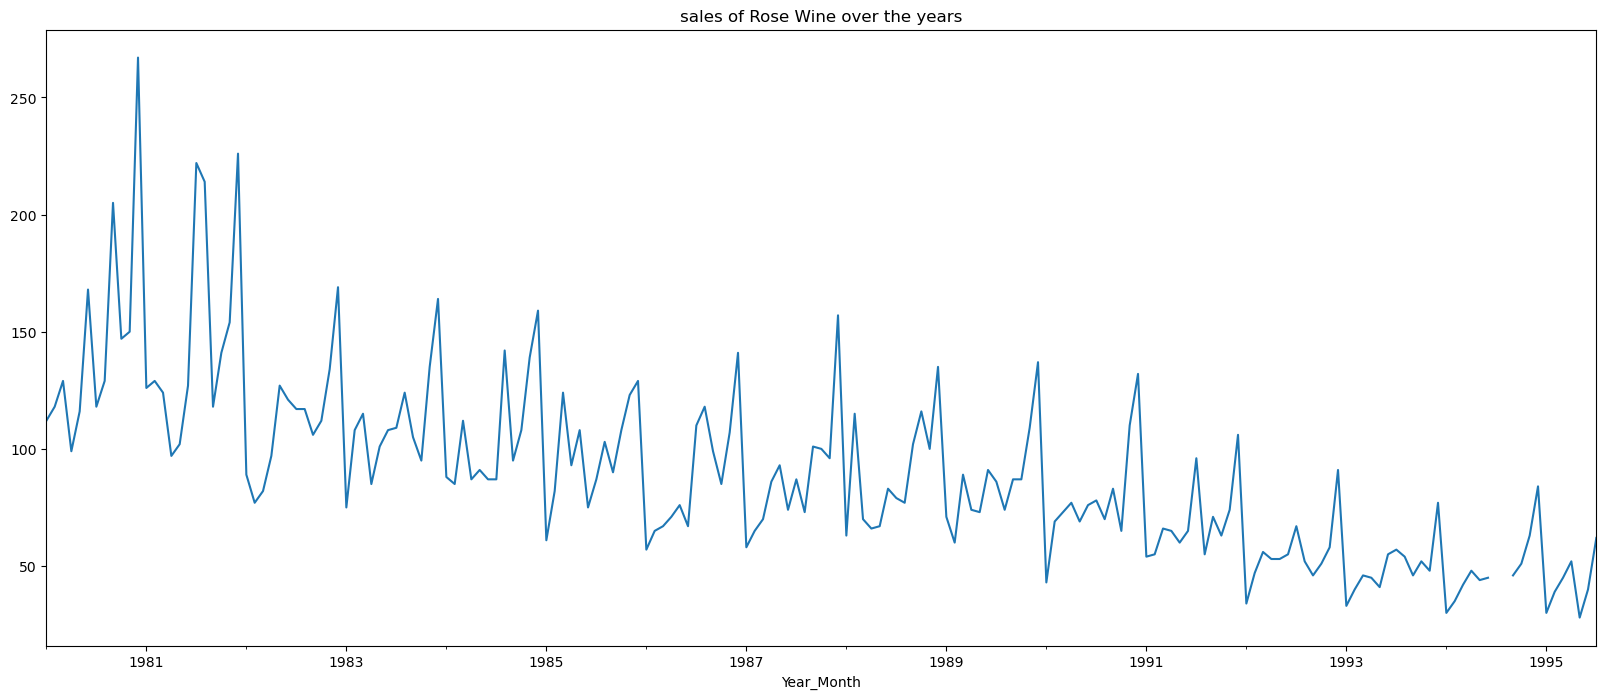

In [13]:
data_rose['Rose'].plot();
plt.title("sales of Rose Wine over the years");

In [13]:
data_rose.describe()

Rose
count  185.000000
mean    90.394595
std     39.175344
min     28.000000
25%     63.000000
50%     86.000000
75%    112.000000
max    267.000000

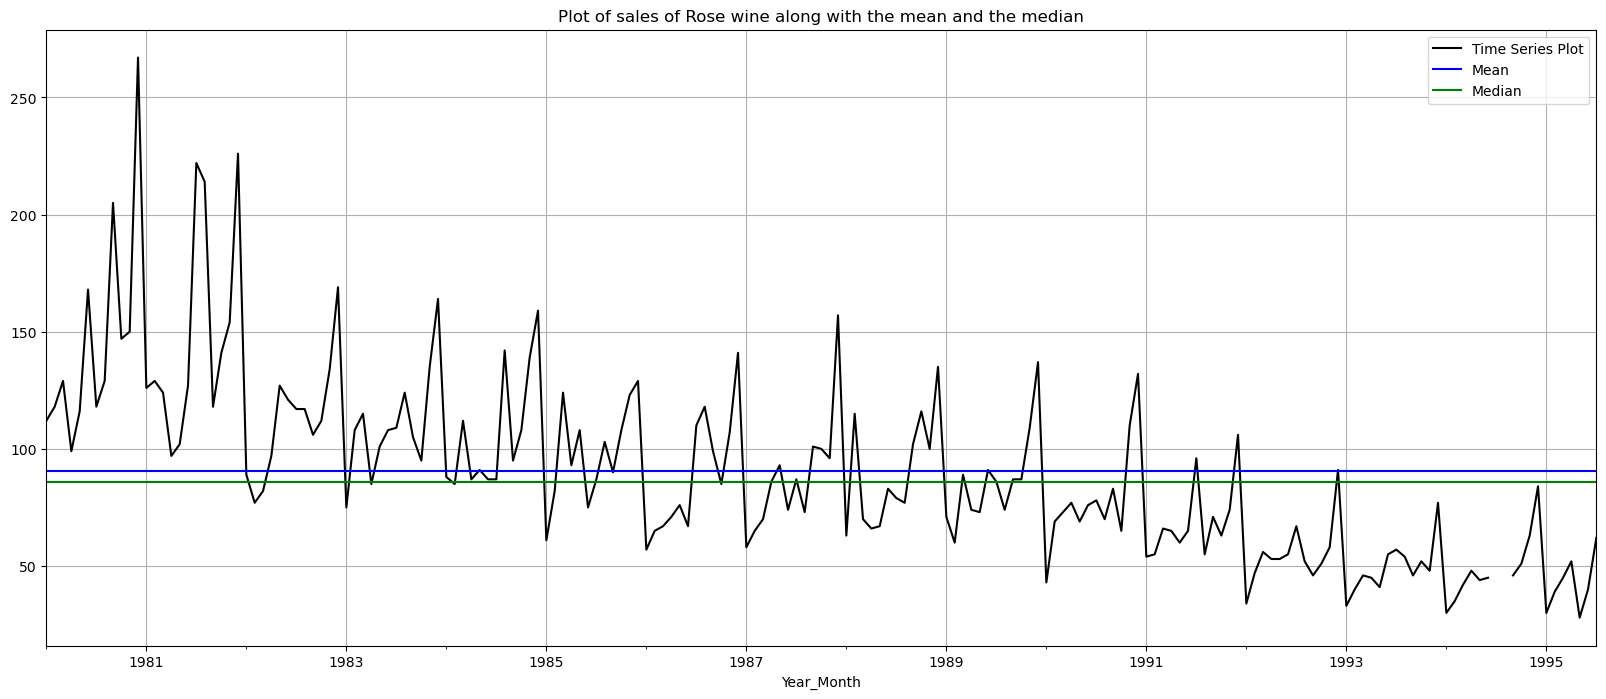

In [14]:
data_rose.plot(color='Black')
plt.axhline(data_rose['Rose'].mean(),color='Blue')
plt.axhline(data_rose['Rose'].median(),color='Green')
plt.grid()
plt.legend(['Time Series Plot','Mean','Median']);
plt.title('Plot of sales of Rose wine along with the mean and the median');

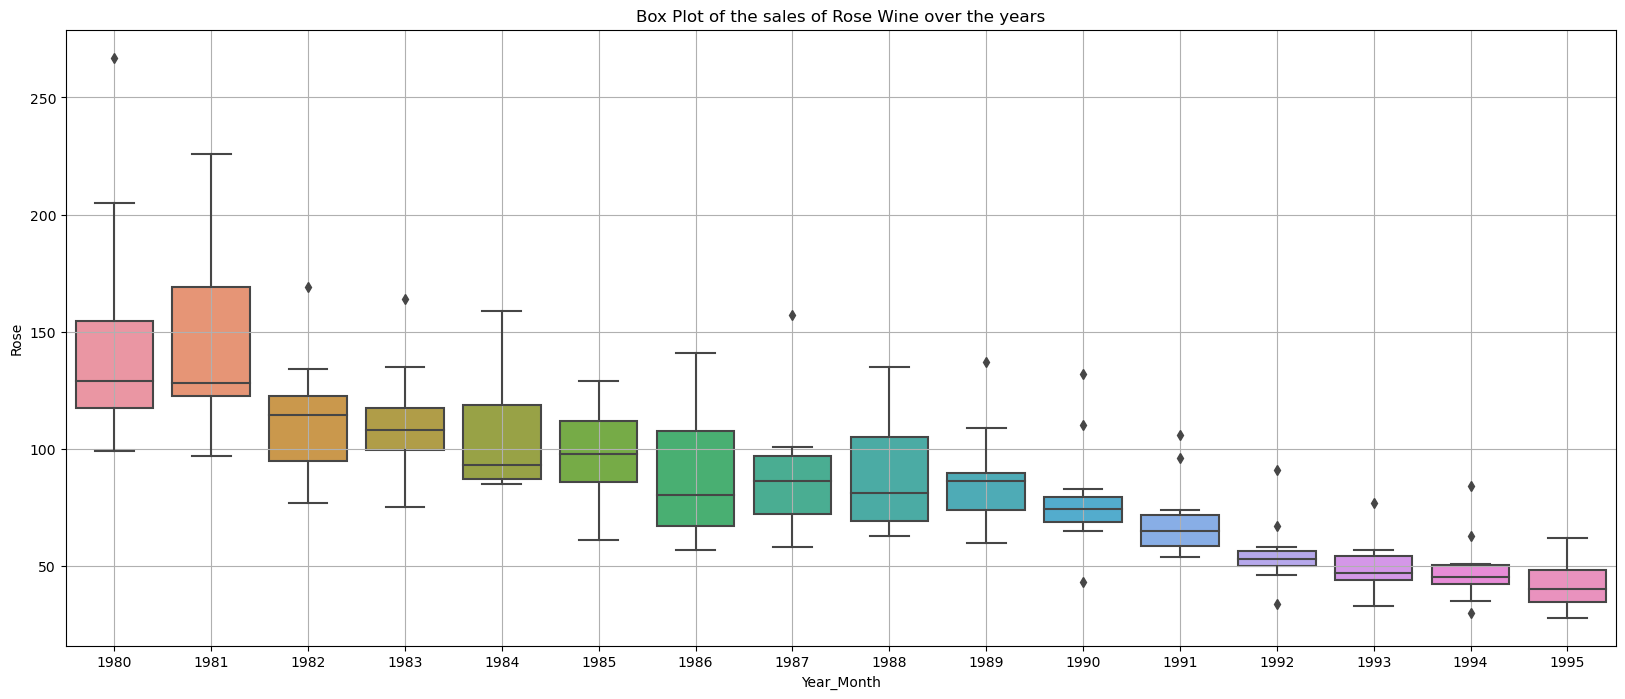

In [30]:
sns.boxplot(x = data_rose.index.year,y = data_rose['Rose'])
plt.grid();
plt.title('Box Plot of the sales of Rose Wine over the years');

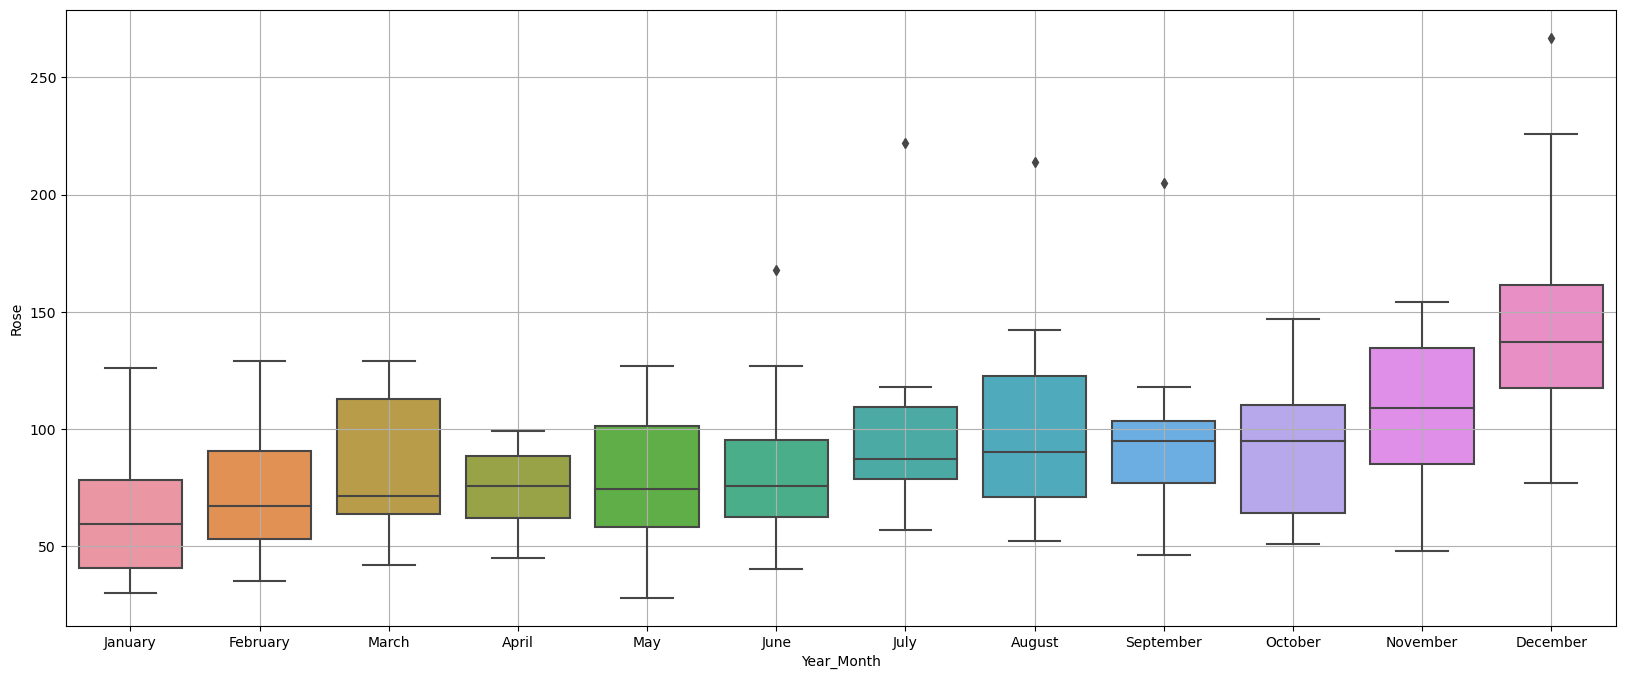

In [16]:
#Monthly Plot
sns.boxplot(x = data_rose.index.month_name(),y = data_rose['Rose'])
plt.grid();

C:\Users\ebyeb\anaconda3\Lib\site-packages\matplotlib\axes\_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


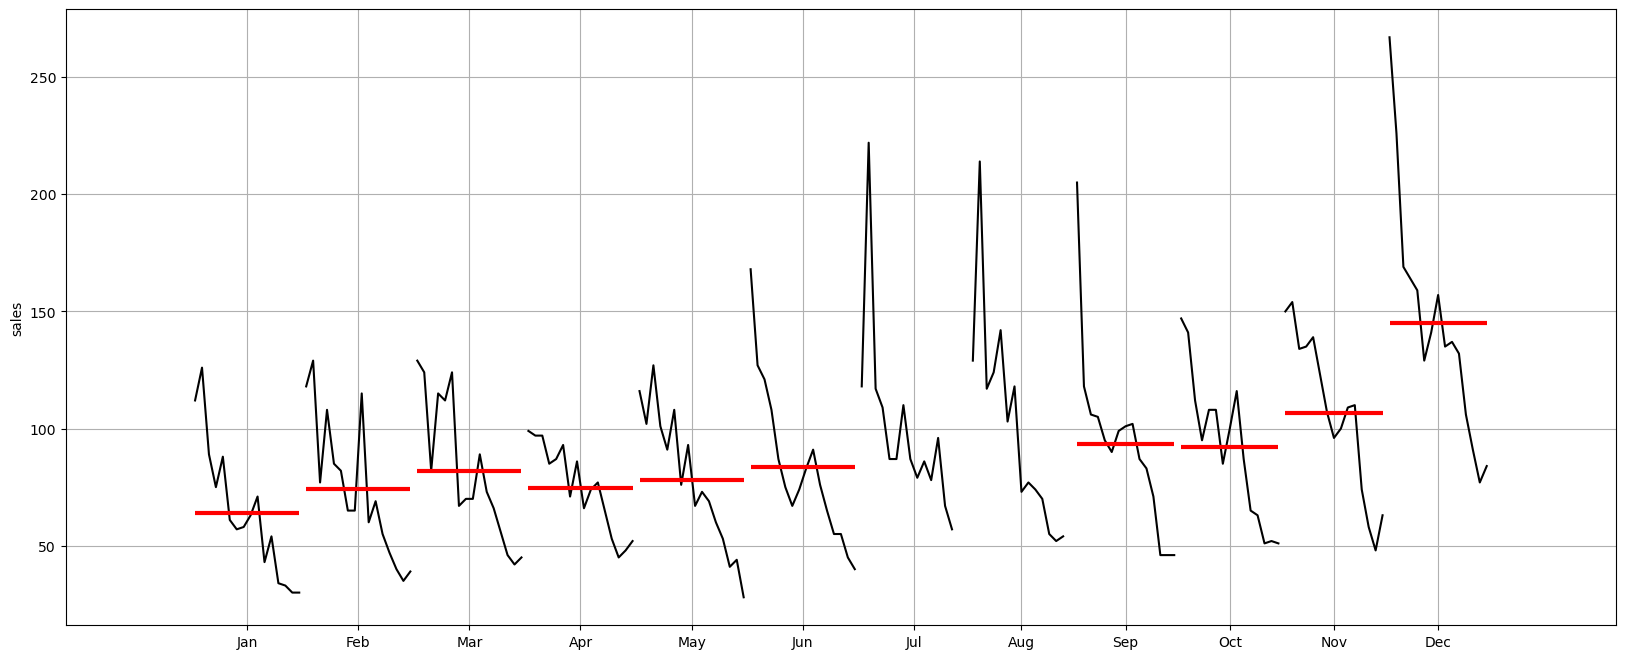

In [17]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(data_rose['Rose'],ylabel='sales')
plt.grid();


In [17]:

monthly_sales_across_years = pd.pivot_table(data_rose, values = 'Rose', columns = data_rose.index.month, index = data_rose.index.year)
monthly_sales_across_years

Year_Month     1      2      3     4      5      6      7      8      9   \
Year_Month                                                                 
1980        112.0  118.0  129.0  99.0  116.0  168.0  118.0  129.0  205.0   
1981        126.0  129.0  124.0  97.0  102.0  127.0  222.0  214.0  118.0   
1982         89.0   77.0   82.0  97.0  127.0  121.0  117.0  117.0  106.0   
1983         75.0  108.0  115.0  85.0  101.0  108.0  109.0  124.0  105.0   
1984         88.0   85.0  112.0  87.0   91.0   87.0   87.0  142.0   95.0   
1985         61.0   82.0  124.0  93.0  108.0   75.0   87.0  103.0   90.0   
1986         57.0   65.0   67.0  71.0   76.0   67.0  110.0  118.0   99.0   
1987         58.0   65.0   70.0  86.0   93.0   74.0   87.0   73.0  101.0   
1988         63.0  115.0   70.0  66.0   67.0   83.0   79.0   77.0  102.0   
1989         71.0   60.0   89.0  74.0   73.0   91.0   86.0   74.0   87.0   
1990         43.0   69.0   73.0  77.0   69.0   76.0   78.0   70.0   83.0   
1991         54.0   55.0   66.0  65.0   60.0   65.0   96.0   55.0   71.0   
1992         34.0   47.0   56.0  53.0   53.0   55.0   67.0   52.0   46.0   
1993         33.0   40.0   46.0  45.0   41.0   55.0   57.0   54.0   46.0   
1994         30.0   35.0   42.0  48.0   44.0   45.0    NaN    NaN   46.0   
1995         30.0   39.0   45.0  52.0   28.0   40.0   62.0    NaN    NaN   

Year_Month     10     11     12  
Year_Month                       
1980        147.0  150.0  267.0  
1981        141.0  154.0  226.0  
1982        112.0  134.0  169.0  
1983         95.0  135.0  164.0  
1984        108.0  139.0  159.0  
1985        108.0  123.0  129.0  
1986         85.0  107.0  141.0  
1987        100.0   96.0  157.0  
1988        116.0  100.0  135.0  
1989         87.0  109.0  137.0  
1990         65.0  110.0  132.0  
1991         63.0   74.0  106.0  
1992         51.0   58.0   91.0  
1993         52.0   48.0   77.0  
1994         51.0   63.0   84.0  
1995          NaN    NaN    NaN

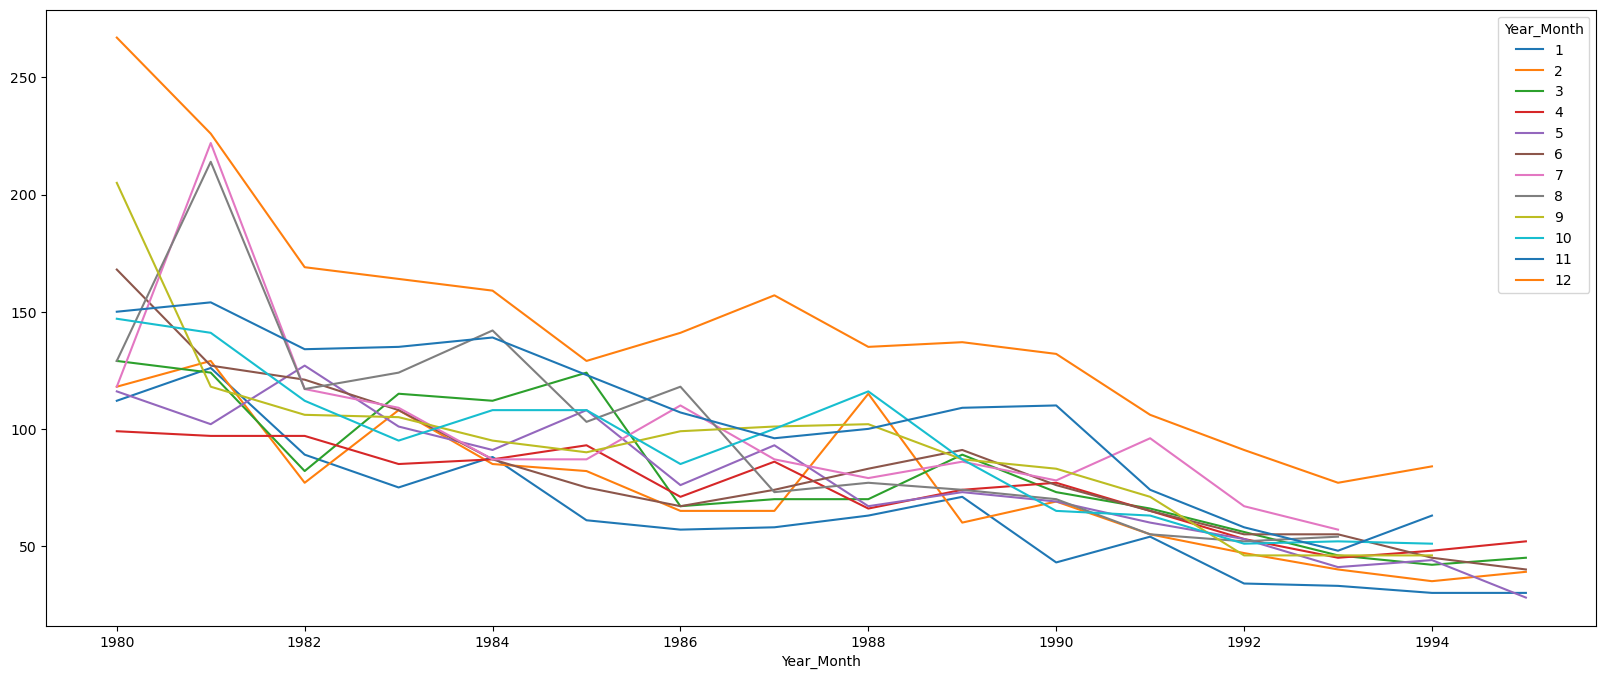

In [19]:
monthly_sales_across_years.plot();

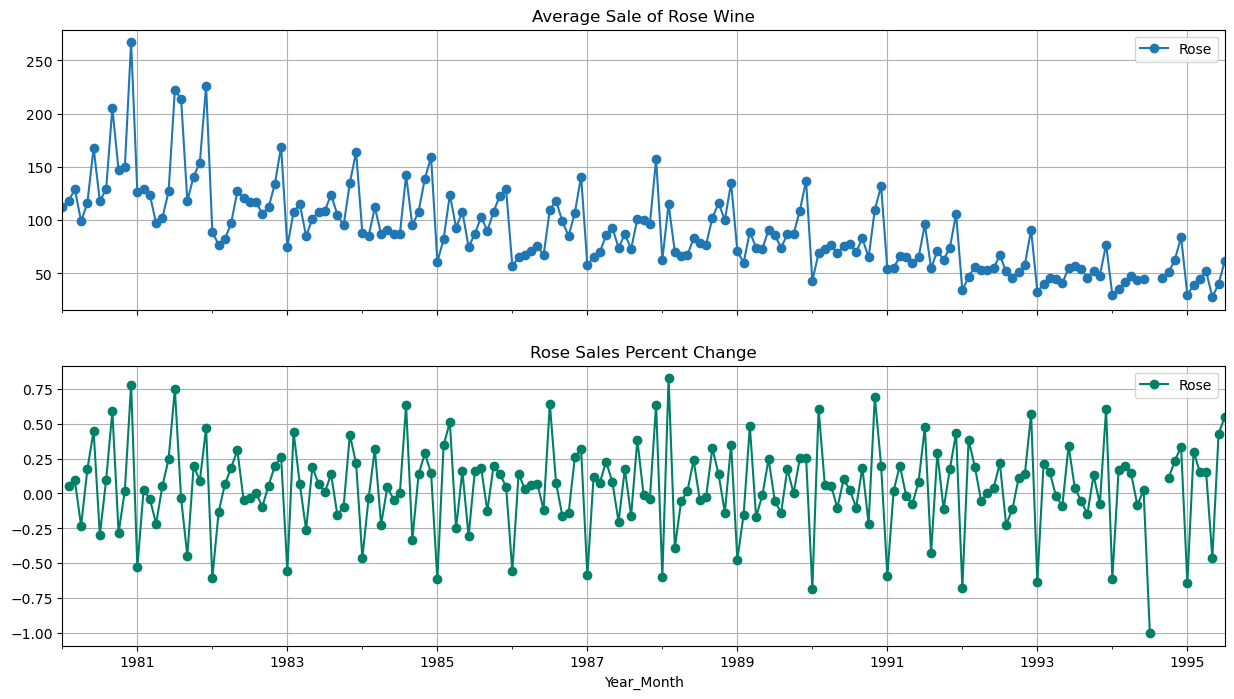

In [18]:

average    = data_rose.groupby(data_rose.index)["Rose"].mean()
pct_change = data_rose.groupby(data_rose.index)["Rose"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))


ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sale of Rose Wine",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())

ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Rose Sales Percent Change",grid=True)

In [20]:
from    statsmodels.tsa.seasonal import   seasonal_decompose


In [21]:
data_rose['YearMonth']  = pd.to_datetime(date_range)

In [22]:
data_rose["Month"] = data_rose["YearMonth"].dt.month
data_rose["Day"] = data_rose["YearMonth"].dt.day
data_rose["Year"] = data_rose["YearMonth"].dt.year

In [23]:
data_rose = data_rose.drop(columns=['YearMonth'])

In [24]:
data_rose

Rose  Month  Day  Year
Year_Month                         
1980-01-31  112.0      1   31  1980
1980-02-29  118.0      2   29  1980
1980-03-31  129.0      3   31  1980
1980-04-30   99.0      4   30  1980
1980-05-31  116.0      5   31  1980
...           ...    ...  ...   ...
1995-03-31   45.0      3   31  1995
1995-04-30   52.0      4   30  1995
1995-05-31   28.0      5   31  1995
1995-06-30   40.0      6   30  1995
1995-07-31   62.0      7   31  1995

[187 rows x 4 columns]

In [26]:
monthly_average = data_rose.groupby("Month")["Rose"].mean()


In [27]:
monthly_average

Month
1      64.000000
2      74.312500
3      81.875000
4      74.687500
5      78.062500
6      83.562500
7      97.466667
8     100.142857
9      93.333333
10     92.066667
11    106.666667
12    144.933333
Name: Rose, dtype: float64

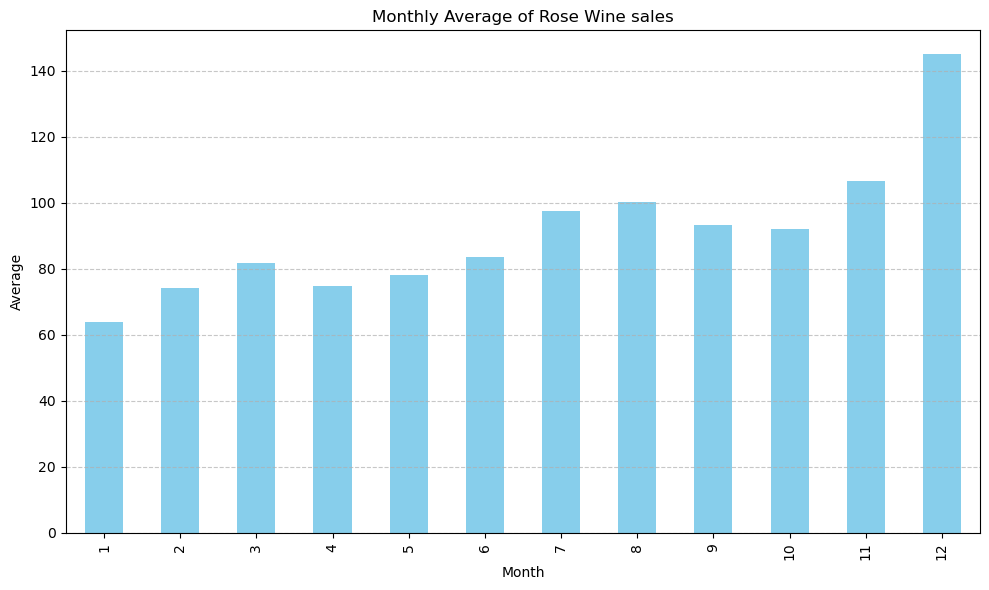

In [28]:
plt.figure(figsize=(10, 6))
monthly_average.plot(kind='bar', color='skyblue')
plt.title('Monthly Average of Rose Wine sales')
plt.xlabel('Month')
plt.ylabel('Average')  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [29]:
yearly_average = data_rose.groupby("Year")["Rose"].mean()

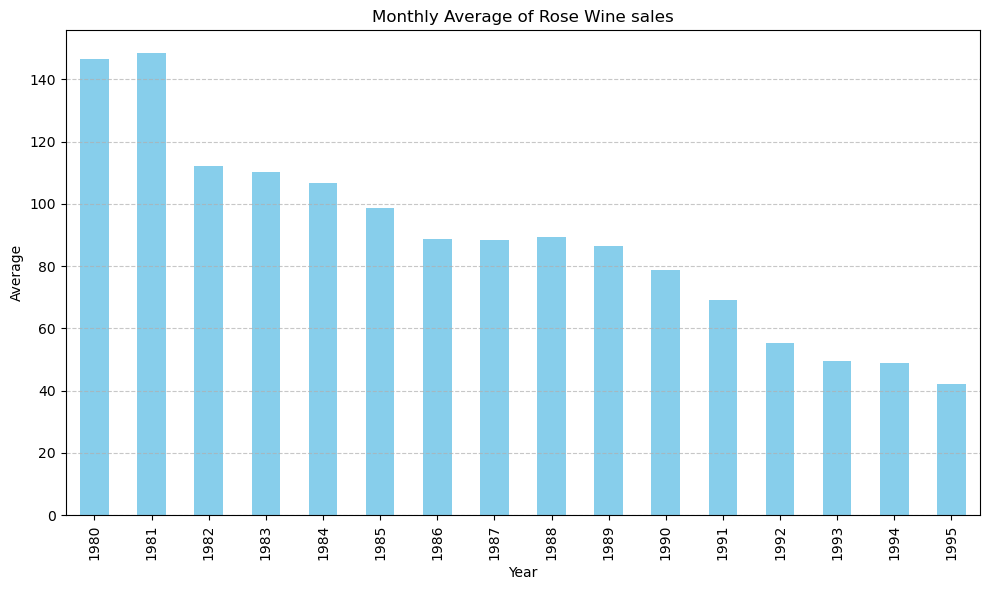

In [30]:
plt.figure(figsize=(10, 6))
yearly_average.plot(kind='bar', color='skyblue')
plt.title('Yearly Average of Rose Wine sales')
plt.xlabel('Year')
plt.ylabel('Average')  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

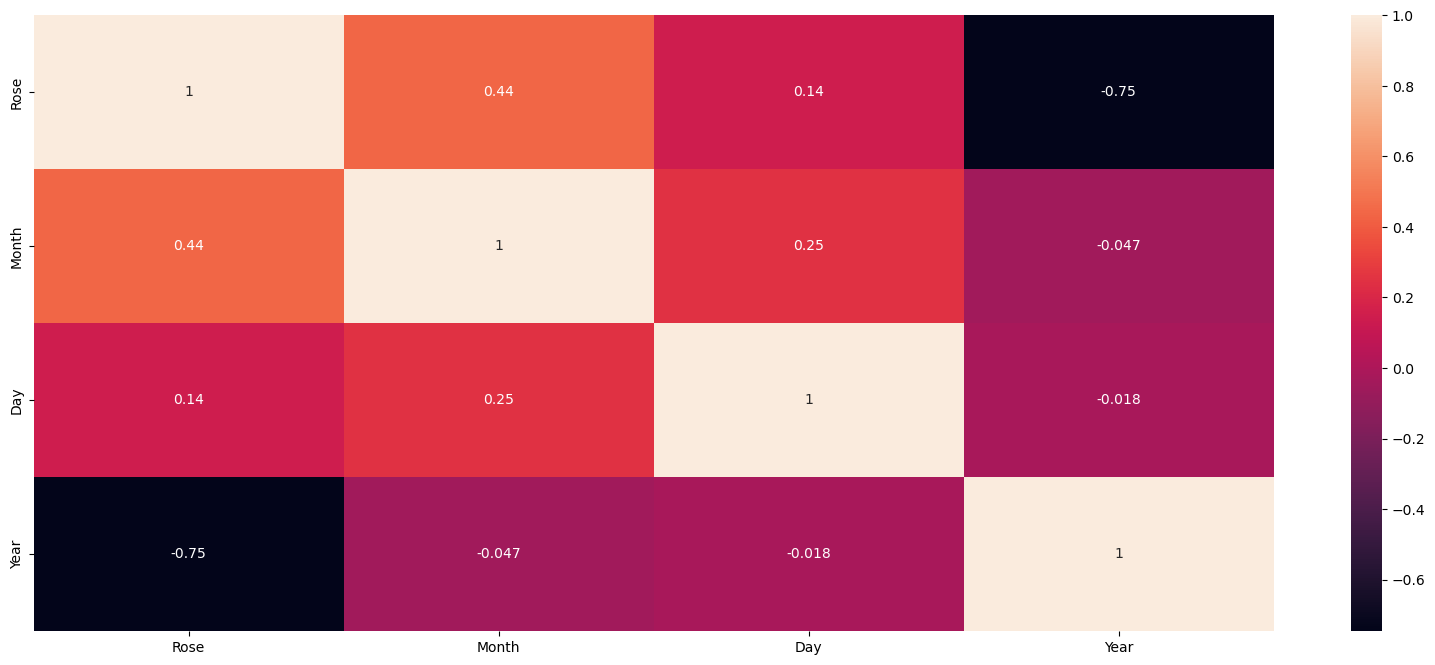

In [152]:
corr_all = data_rose.corr()
mask = np.array(corr_all)
sns.heatmap(corr_all,annot=True);
plt.show()

# Data Pre-processing
- Missing value treatment - Visualize the processed data - Train-test split

In [31]:
data_rose.isna().sum()

Rose     2
Month    0
Day      0
Year     0
dtype: int64

In [32]:
data_rose['Rose'] = data_rose['Rose'].interpolate(method='time')

In [33]:
data_rose.isna().sum()

Rose     0
Month    0
Day      0
Year     0
dtype: int64

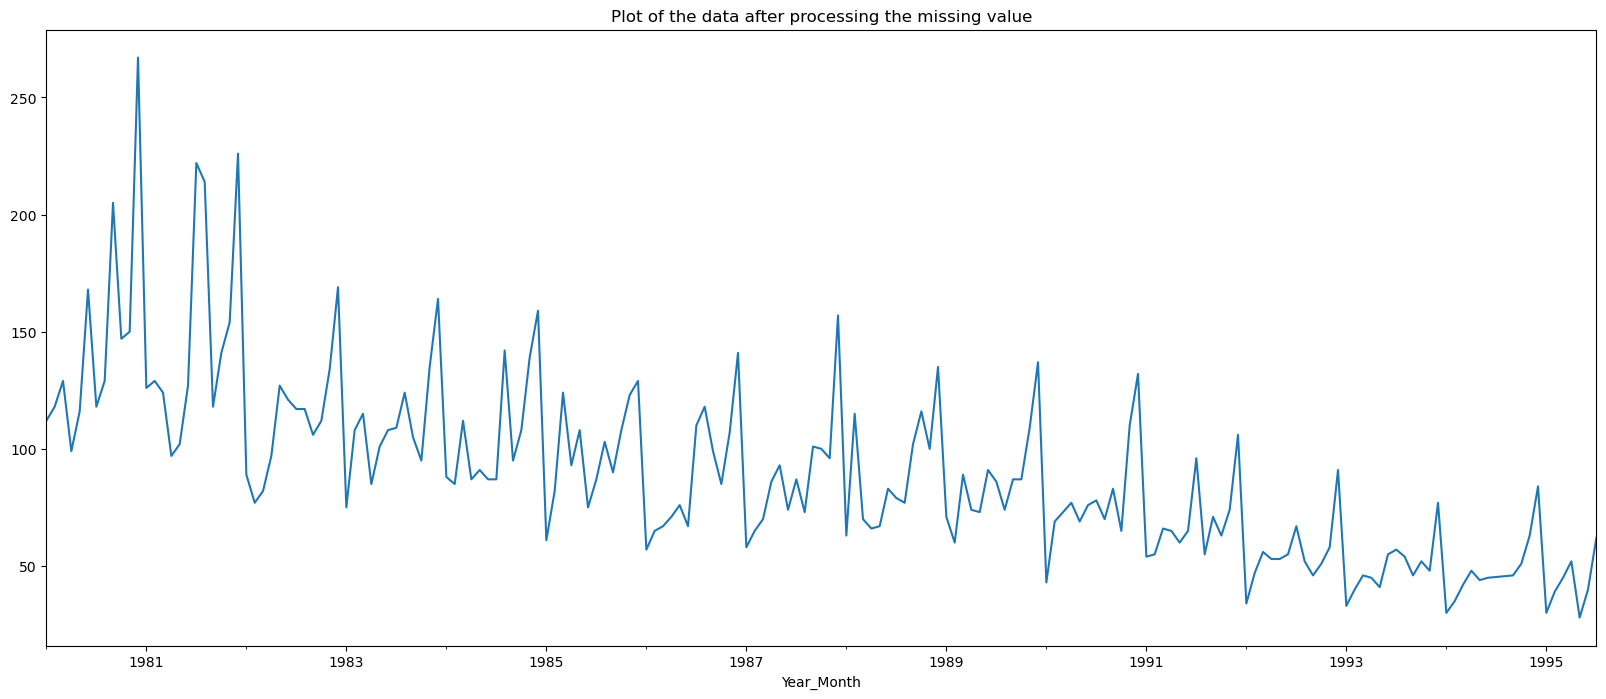

In [34]:
data_rose['Rose'].plot();
plt.title('Plot of the data after processing the missing value');

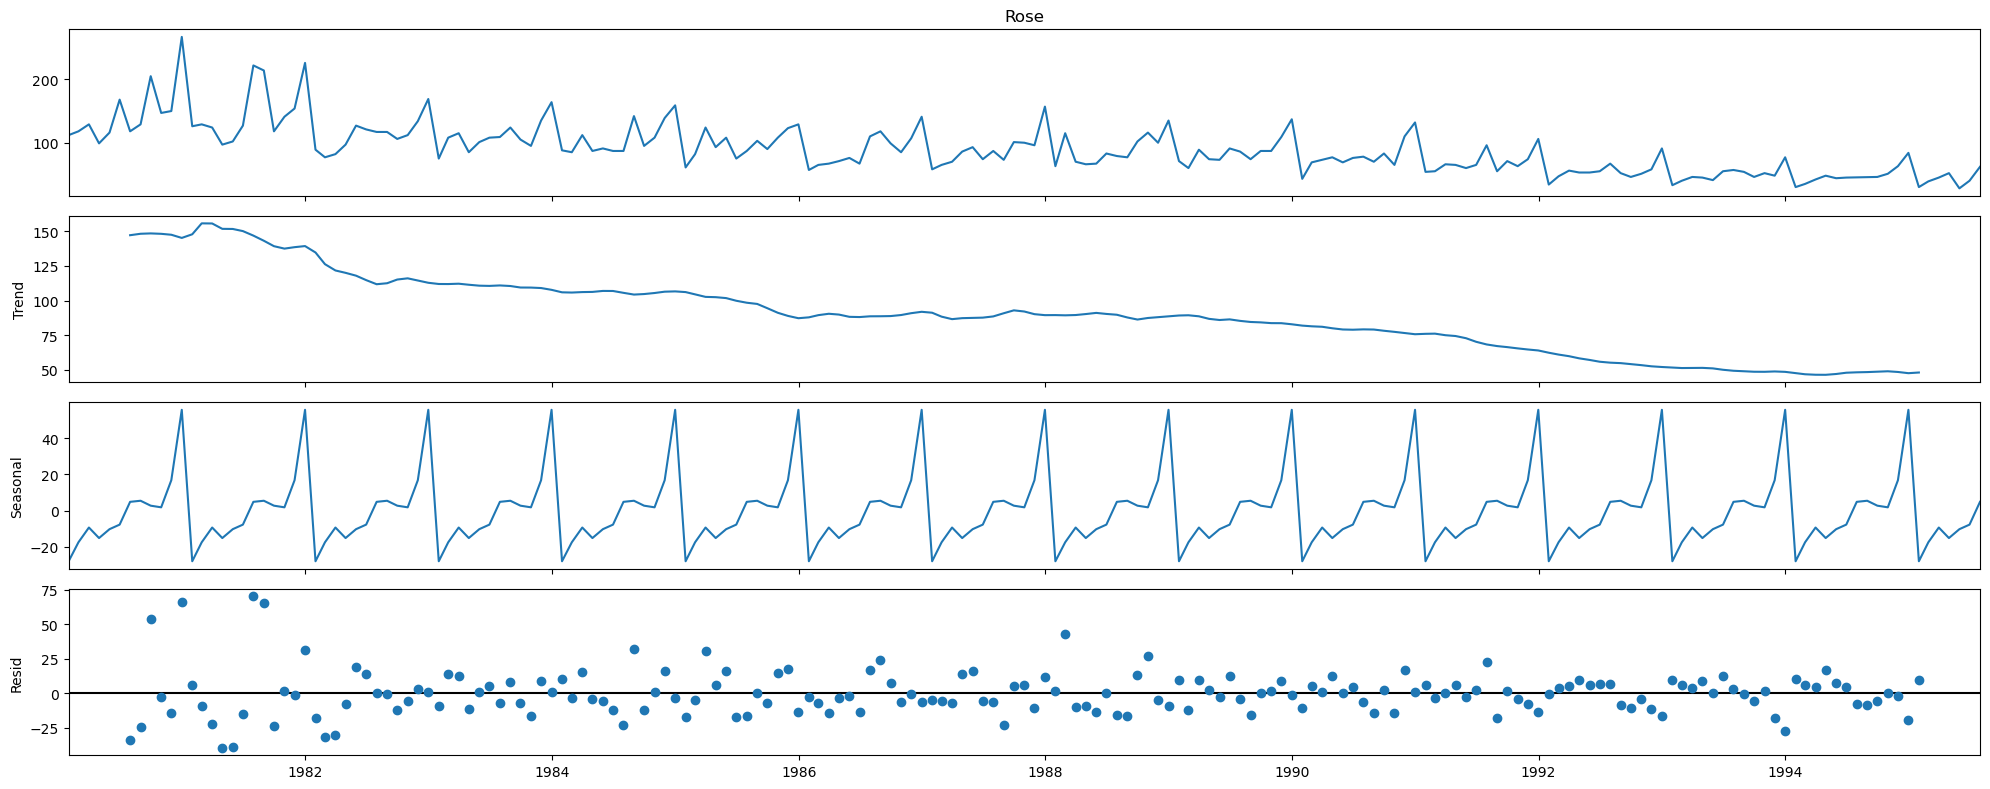

In [35]:
decomposition = seasonal_decompose(data_rose['Rose'],model='additive')
decomposition.plot();


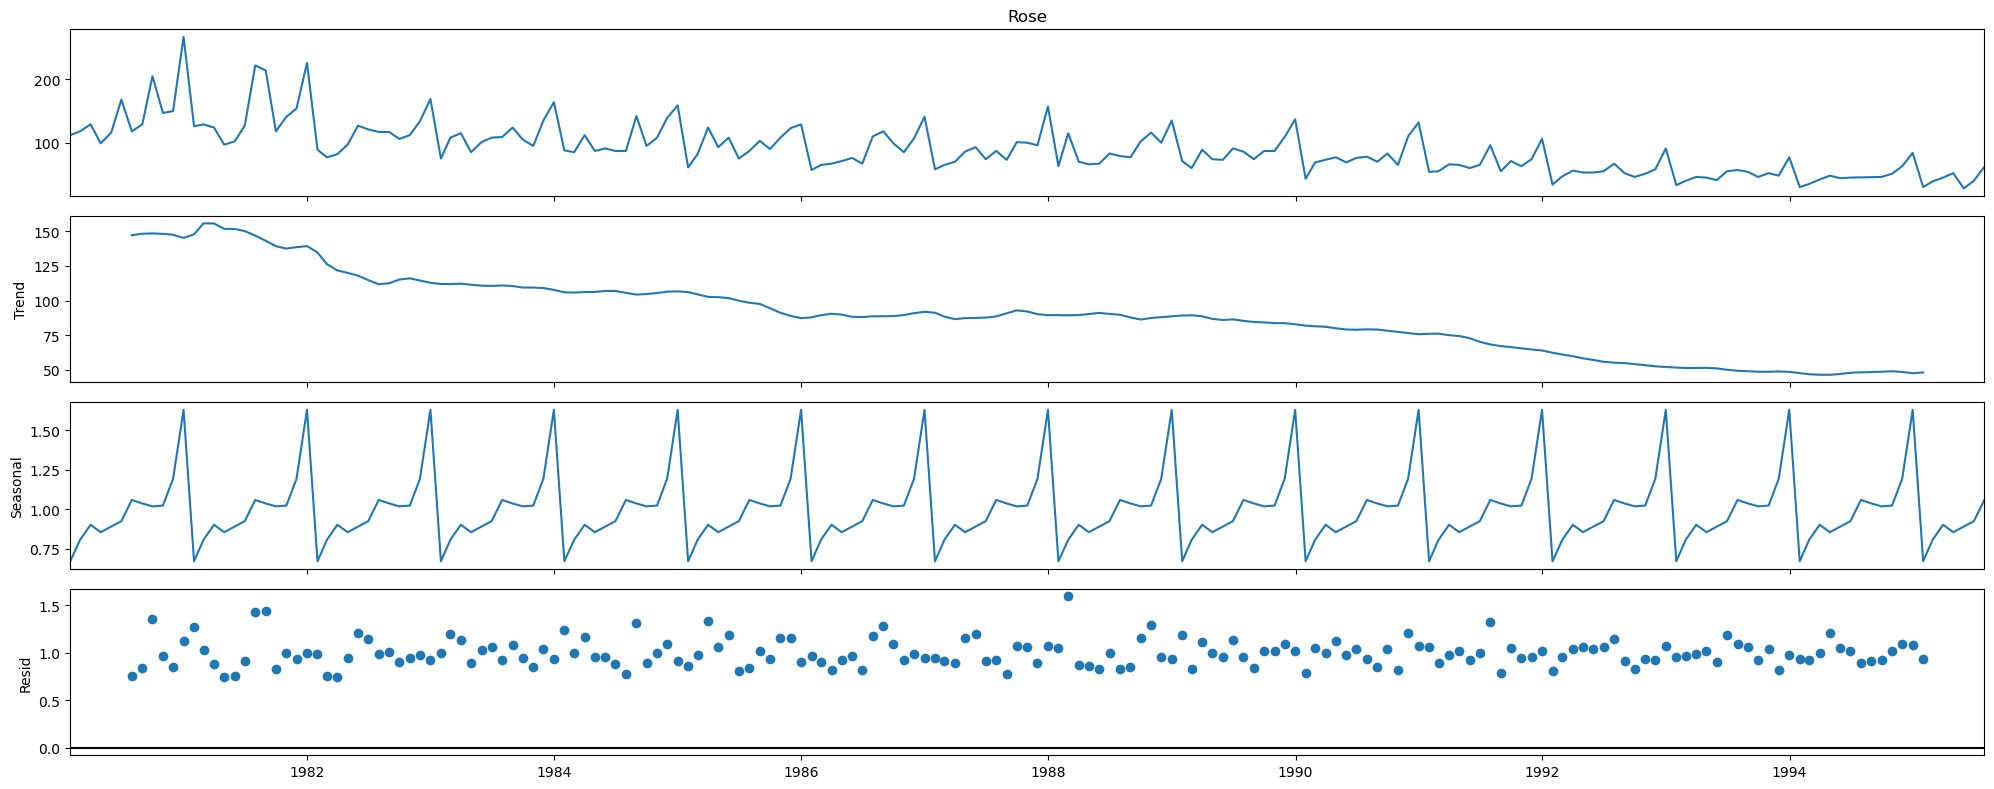

In [36]:
decomposition = seasonal_decompose(data_rose['Rose'],model='multiplicative')
decomposition.plot();

In [37]:
split_index = int(len(data_rose) * 0.7)

In [38]:
train_rose = data_rose.iloc[:split_index]

In [39]:
train_rose

Rose  Month  Day  Year
Year_Month                         
1980-01-31  112.0      1   31  1980
1980-02-29  118.0      2   29  1980
1980-03-31  129.0      3   31  1980
1980-04-30   99.0      4   30  1980
1980-05-31  116.0      5   31  1980
...           ...    ...  ...   ...
1990-06-30   76.0      6   30  1990
1990-07-31   78.0      7   31  1990
1990-08-31   70.0      8   31  1990
1990-09-30   83.0      9   30  1990
1990-10-31   65.0     10   31  1990

[130 rows x 4 columns]

In [40]:
test_rose = data_rose.iloc[split_index:]

In [41]:
print(len(train_rose))
print(len(test_rose))

130
57


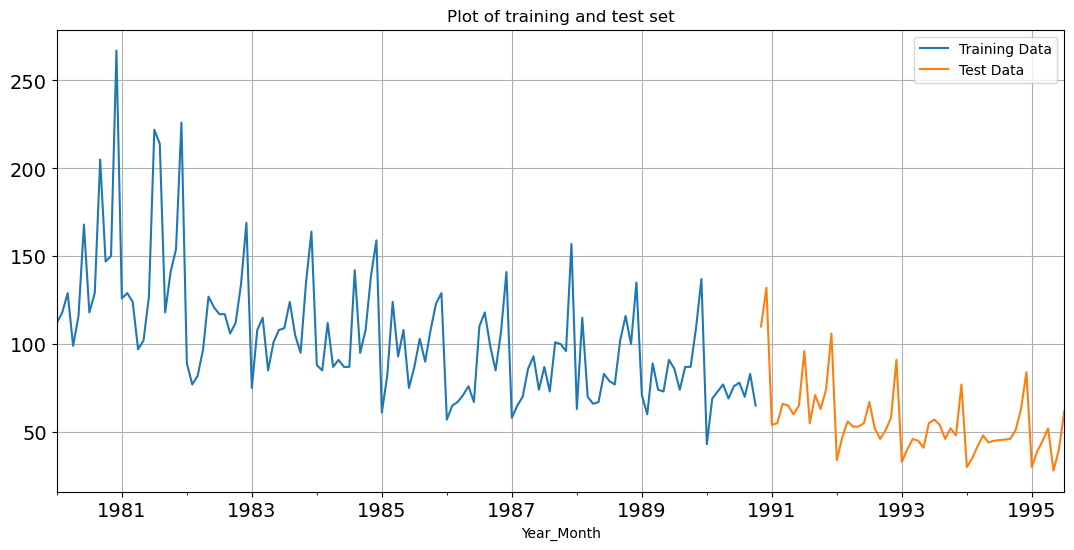

In [42]:
train_rose['Rose'].plot(figsize=(13,6), fontsize=14)
test_rose['Rose'].plot(figsize=(13,6), fontsize=14)
plt.grid()
plt.title('Plot of training and test set')
plt.legend(['Training Data','Test Data'])
plt.show()                           

In [43]:
train_rose['Rose'].head()

Year_Month
1980-01-31    112.0
1980-02-29    118.0
1980-03-31    129.0
1980-04-30     99.0
1980-05-31    116.0
Name: Rose, dtype: float64

In [44]:
test_rose['Rose'].head()

Year_Month
1990-11-30    110.0
1990-12-31    132.0
1991-01-31     54.0
1991-02-28     55.0
1991-03-31     66.0
Name: Rose, dtype: float64

# Model Building - Original Data
- Build forecasting models - Linear regression - Simple Average - Moving Average - Exponential Models (Single, Double, Triple) - Check the performance of the models built

# Linear Regression

In [45]:
train_time = [i+1 for i in range(len(train_rose))]
test_time = [i+131 for i in range(len(test_rose))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130]
Test Time instance 
 [131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [46]:
LinearRegression_train_rose = train_rose.copy()
LinearRegression_test_rose = test_rose.copy()

In [47]:
LinearRegression_train_rose['time'] = train_time
LinearRegression_test_rose['time'] = test_time

In [48]:
print('First few rows of Training Data')
display(LinearRegression_train_rose.head())
print('Last few rows of Training Data')
display(LinearRegression_train_rose.tail())
print('First few rows of Test Data')
display(LinearRegression_test_rose.head())
print('Last few rows of Test Data')
display(LinearRegression_test_rose.tail())

First few rows of Training Data


Rose  Month  Day  Year  time
Year_Month                               
1980-01-31  112.0      1   31  1980     1
1980-02-29  118.0      2   29  1980     2
1980-03-31  129.0      3   31  1980     3
1980-04-30   99.0      4   30  1980     4
1980-05-31  116.0      5   31  1980     5

Last few rows of Training Data


Rose  Month  Day  Year  time
Year_Month                              
1990-06-30  76.0      6   30  1990   126
1990-07-31  78.0      7   31  1990   127
1990-08-31  70.0      8   31  1990   128
1990-09-30  83.0      9   30  1990   129
1990-10-31  65.0     10   31  1990   130

First few rows of Test Data


Rose  Month  Day  Year  time
Year_Month                               
1990-11-30  110.0     11   30  1990   131
1990-12-31  132.0     12   31  1990   132
1991-01-31   54.0      1   31  1991   133
1991-02-28   55.0      2   28  1991   134
1991-03-31   66.0      3   31  1991   135

Last few rows of Test Data


Rose  Month  Day  Year  time
Year_Month                              
1995-03-31  45.0      3   31  1995   183
1995-04-30  52.0      4   30  1995   184
1995-05-31  28.0      5   31  1995   185
1995-06-30  40.0      6   30  1995   186
1995-07-31  62.0      7   31  1995   187

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
lr = LinearRegression()
lr.fit(LinearRegression_train_rose[['time']],LinearRegression_train_rose['Rose'].values)

LinearRegression()

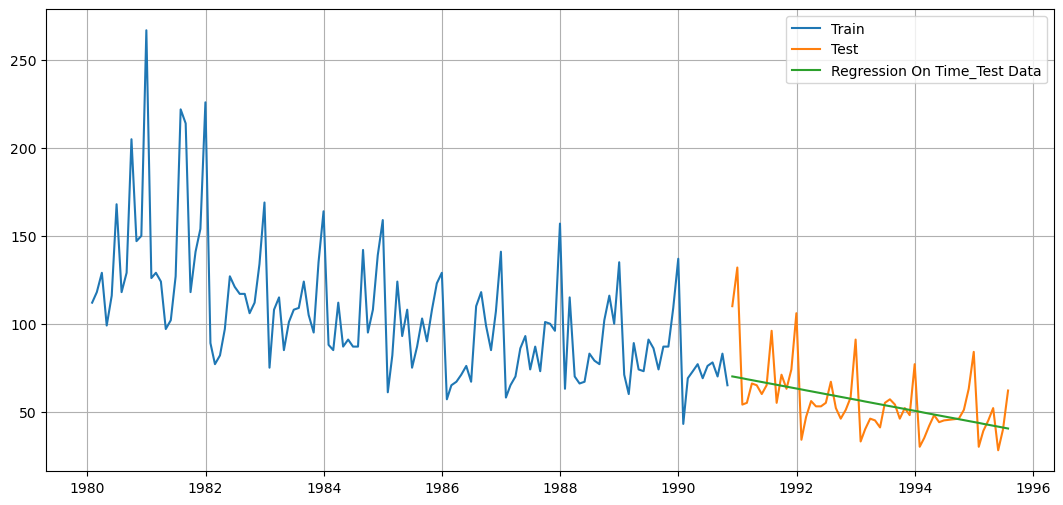

In [51]:
test_predictions_model_linreg  = lr.predict(LinearRegression_test_rose[['time']])
LinearRegression_test_rose['Regressionresult'] = test_predictions_model_linreg

plt.figure(figsize=(13,6))
plt.plot( train_rose['Rose'], label='Train')
plt.plot(test_rose['Rose'], label='Test')
plt.plot(LinearRegression_test_rose['Regressionresult'] , label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

# Model Evaluation

In [52]:
from sklearn import metrics

In [53]:
rmse_model_test_linreg = metrics.mean_squared_error(test_rose['Rose'],test_predictions_model_linreg ,squared=False)
Eval_DF = pd.DataFrame({'Test RMSE': [rmse_model_test_linreg ]},index=['Linear Regression'])
Eval_DF

Test RMSE
Linear Regression  17.355787

# Method 2 - Simple Average

In [54]:
SimpleAverage_train_rose = train_rose.copy()
SimpleAverage_test_rose = test_rose.copy()

In [55]:
SimpleAverage_test_rose['mean_forecast'] = train_rose['Rose'].mean()
SimpleAverage_test_rose.head()

Rose  Month  Day  Year  mean_forecast
Year_Month                                        
1990-11-30  110.0     11   30  1990     104.692308
1990-12-31  132.0     12   31  1990     104.692308
1991-01-31   54.0      1   31  1991     104.692308
1991-02-28   55.0      2   28  1991     104.692308
1991-03-31   66.0      3   31  1991     104.692308

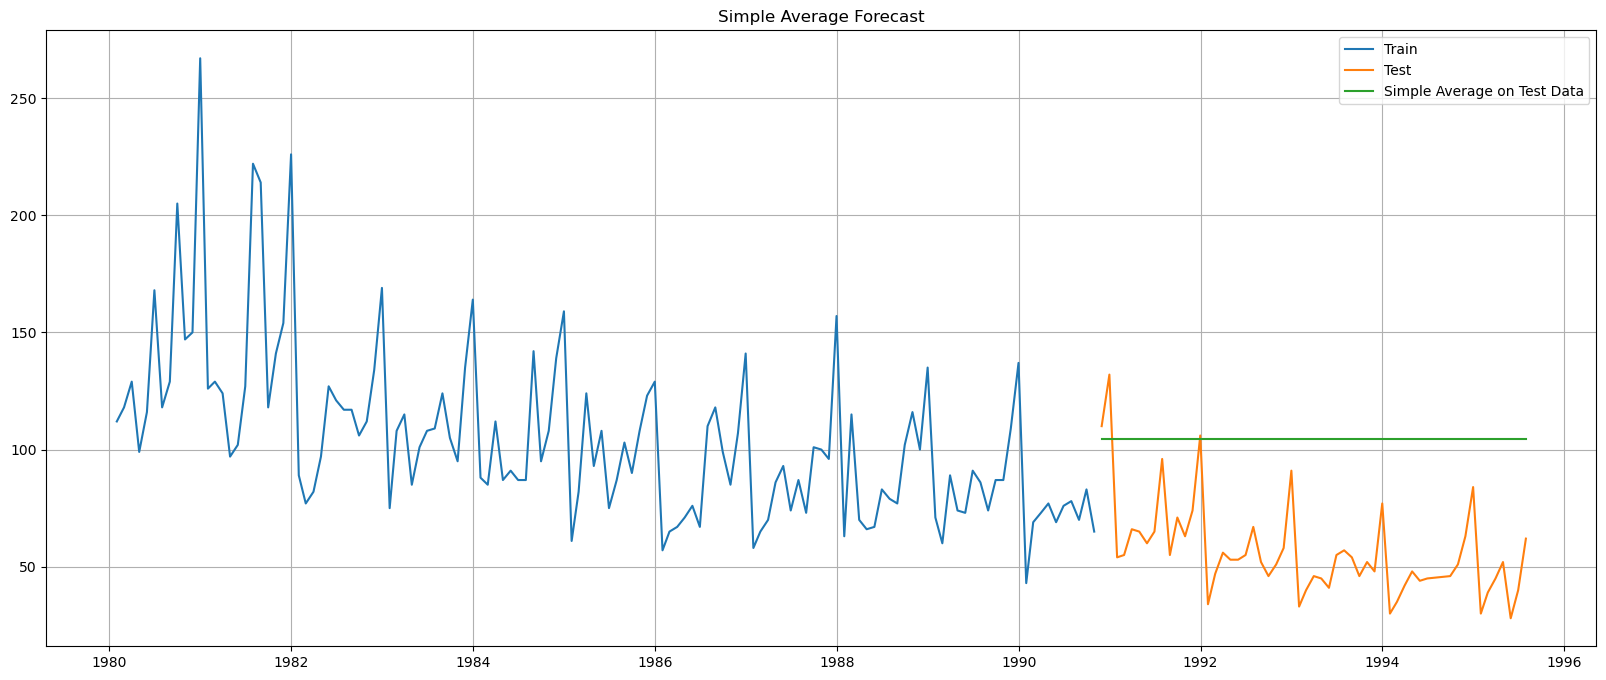

In [56]:
plt.plot(SimpleAverage_train_rose['Rose'], label='Train')
plt.plot(SimpleAverage_test_rose['Rose'], label='Test')

plt.plot(SimpleAverage_test_rose['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

# Model Evaluation

In [57]:
rmse_model2_test_SA = metrics.mean_squared_error(test_rose['Rose'],SimpleAverage_test_rose['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test_SA))

For Simple Average forecast on the Test Data,  RMSE is 52.412


In [58]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test_SA]}
                           ,index=['SimpleAverageModel'])

Eval_DF = pd.concat([Eval_DF, resultsDf_2])
Eval_DF

Test RMSE
Linear Regression   17.355787
SimpleAverageModel  52.411878

# Moving Average

In [59]:
MovingAverage_rose = data_rose.copy()
MovingAverage_rose.head()

Rose  Month  Day  Year
Year_Month                         
1980-01-31  112.0      1   31  1980
1980-02-29  118.0      2   29  1980
1980-03-31  129.0      3   31  1980
1980-04-30   99.0      4   30  1980
1980-05-31  116.0      5   31  1980

In [60]:
MovingAverage_rose['Trailing_2'] = MovingAverage_rose['Rose'].rolling(2).mean()
MovingAverage_rose['Trailing_4'] = MovingAverage_rose['Rose'].rolling(4).mean()
MovingAverage_rose['Trailing_6'] = MovingAverage_rose['Rose'].rolling(6).mean()
MovingAverage_rose['Trailing_9'] = MovingAverage_rose['Rose'].rolling(9).mean()


In [61]:
MovingAverage_rose.head()

Rose  Month  Day  Year  Trailing_2  Trailing_4  Trailing_6  \
Year_Month                                                                
1980-01-31  112.0      1   31  1980         NaN         NaN         NaN   
1980-02-29  118.0      2   29  1980       115.0         NaN         NaN   
1980-03-31  129.0      3   31  1980       123.5         NaN         NaN   
1980-04-30   99.0      4   30  1980       114.0       114.5         NaN   
1980-05-31  116.0      5   31  1980       107.5       115.5         NaN   

            Trailing_9  
Year_Month              
1980-01-31         NaN  
1980-02-29         NaN  
1980-03-31         NaN  
1980-04-30         NaN  
1980-05-31         NaN

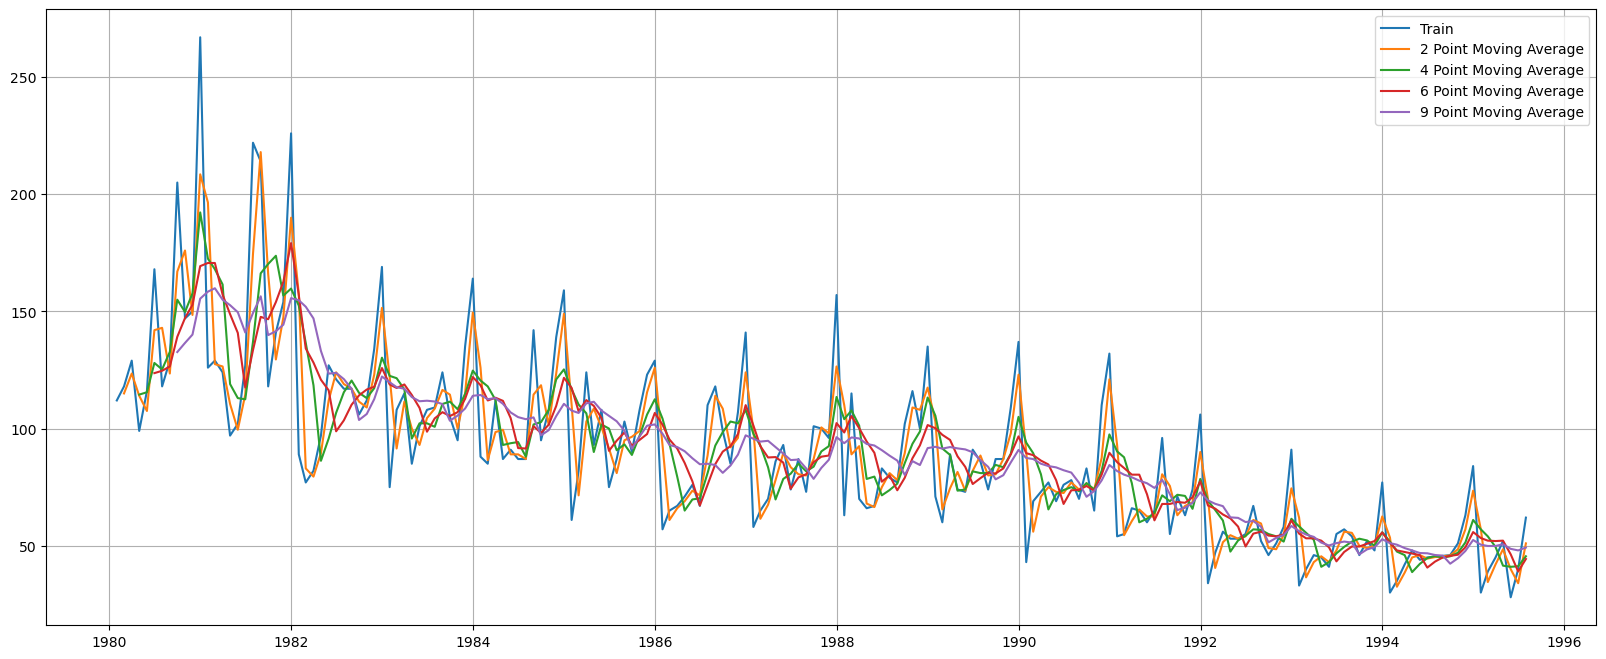

In [62]:


plt.plot(MovingAverage_rose['Rose'], label='Train')
plt.plot(MovingAverage_rose['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage_rose['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage_rose['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage_rose['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [63]:
trailing_MovingAverage_train_rose=MovingAverage_rose[0:int(len(MovingAverage_rose)*0.7)] 
trailing_MovingAverage_test_rose=MovingAverage_rose[int(len(MovingAverage_rose)*0.7):]

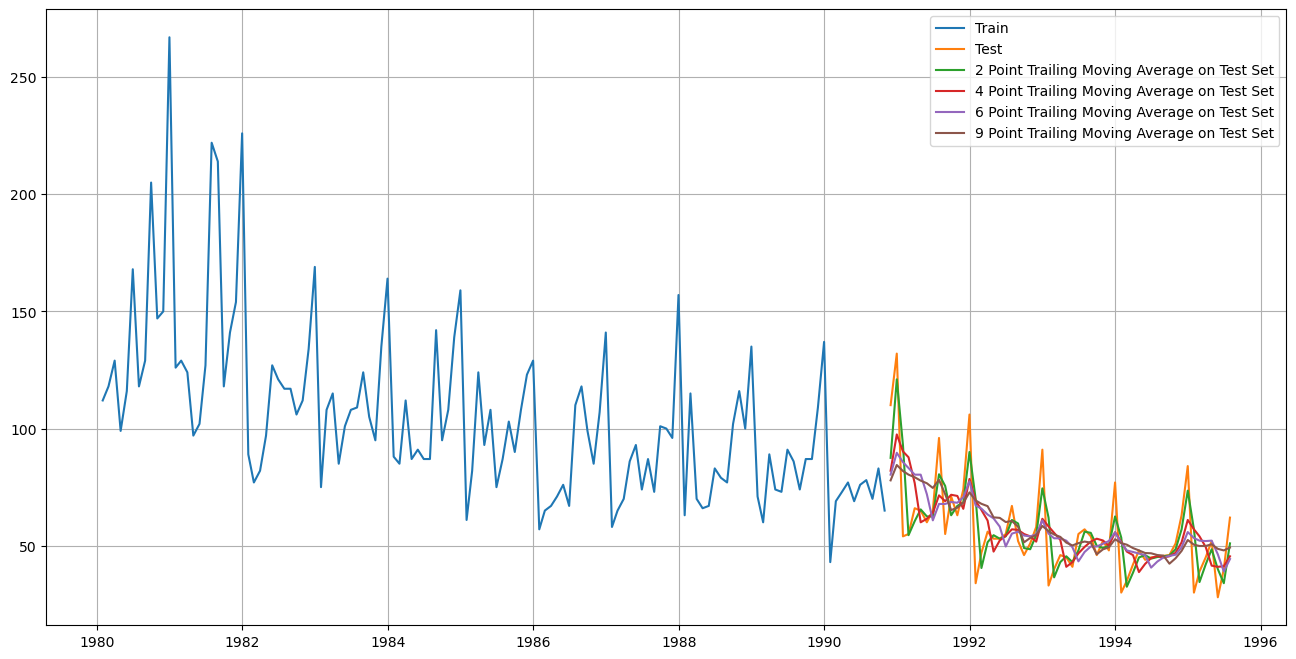

In [64]:
plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train_rose['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test_rose['Rose'], label='Test')


plt.plot(trailing_MovingAverage_test_rose['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test_rose['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test_rose['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test_rose['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

# Model Evaluation

In [65]:
rmse_model3_test_2 = metrics.mean_squared_error(test_rose['Rose'],trailing_MovingAverage_test_rose['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model3_test_2))
rmse_model3_test_4 = metrics.mean_squared_error(test_rose['Rose'],trailing_MovingAverage_test_rose['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model3_test_4))
rmse_model3_test_6 = metrics.mean_squared_error(test_rose['Rose'],trailing_MovingAverage_test_rose['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model3_test_6))
rmse_model3_test_9 = metrics.mean_squared_error(test_rose['Rose'],trailing_MovingAverage_test_rose['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model3_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.801
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 15.367
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 15.862
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 16.342


In [66]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test_2,rmse_model3_test_4
                                          ,rmse_model3_test_6,rmse_model3_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

Eval_DF = pd.concat([Eval_DF, resultsDf_3])
Eval_DF

Test RMSE
Linear Regression            17.355787
SimpleAverageModel           52.411878
2pointTrailingMovingAverage  11.801043
4pointTrailingMovingAverage  15.367176
6pointTrailingMovingAverage  15.862298
9pointTrailingMovingAverage  16.341888

# Method 4: Simple Exponential Smoothing

In [67]:
SES_train_rose = train_rose.copy()
SES_test_rose = test_rose.copy()

In [68]:
from   statsmodels.tsa.api  import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [69]:
model_SES = SimpleExpSmoothing(SES_train_rose['Rose'])

C:\Users\ebyeb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [70]:
model_SES_autofit = model_SES.fit(optimized=True)


In [71]:
model_SES_autofit.params

{'smoothing_level': 0.12777740777753646,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [72]:
SES_predict_rose = model_SES_autofit.forecast(steps=len(test_rose))
SES_predict_rose

1990-11-30    77.599284
1990-12-31    77.599284
1991-01-31    77.599284
1991-02-28    77.599284
1991-03-31    77.599284
1991-04-30    77.599284
1991-05-31    77.599284
1991-06-30    77.599284
1991-07-31    77.599284
1991-08-31    77.599284
1991-09-30    77.599284
1991-10-31    77.599284
1991-11-30    77.599284
1991-12-31    77.599284
1992-01-31    77.599284
1992-02-29    77.599284
1992-03-31    77.599284
1992-04-30    77.599284
1992-05-31    77.599284
1992-06-30    77.599284
1992-07-31    77.599284
1992-08-31    77.599284
1992-09-30    77.599284
1992-10-31    77.599284
1992-11-30    77.599284
1992-12-31    77.599284
1993-01-31    77.599284
1993-02-28    77.599284
1993-03-31    77.599284
1993-04-30    77.599284
1993-05-31    77.599284
1993-06-30    77.599284
1993-07-31    77.599284
1993-08-31    77.599284
1993-09-30    77.599284
1993-10-31    77.599284
1993-11-30    77.599284
1993-12-31    77.599284
1994-01-31    77.599284
1994-02-28    77.599284
1994-03-31    77.599284
1994-04-30    77

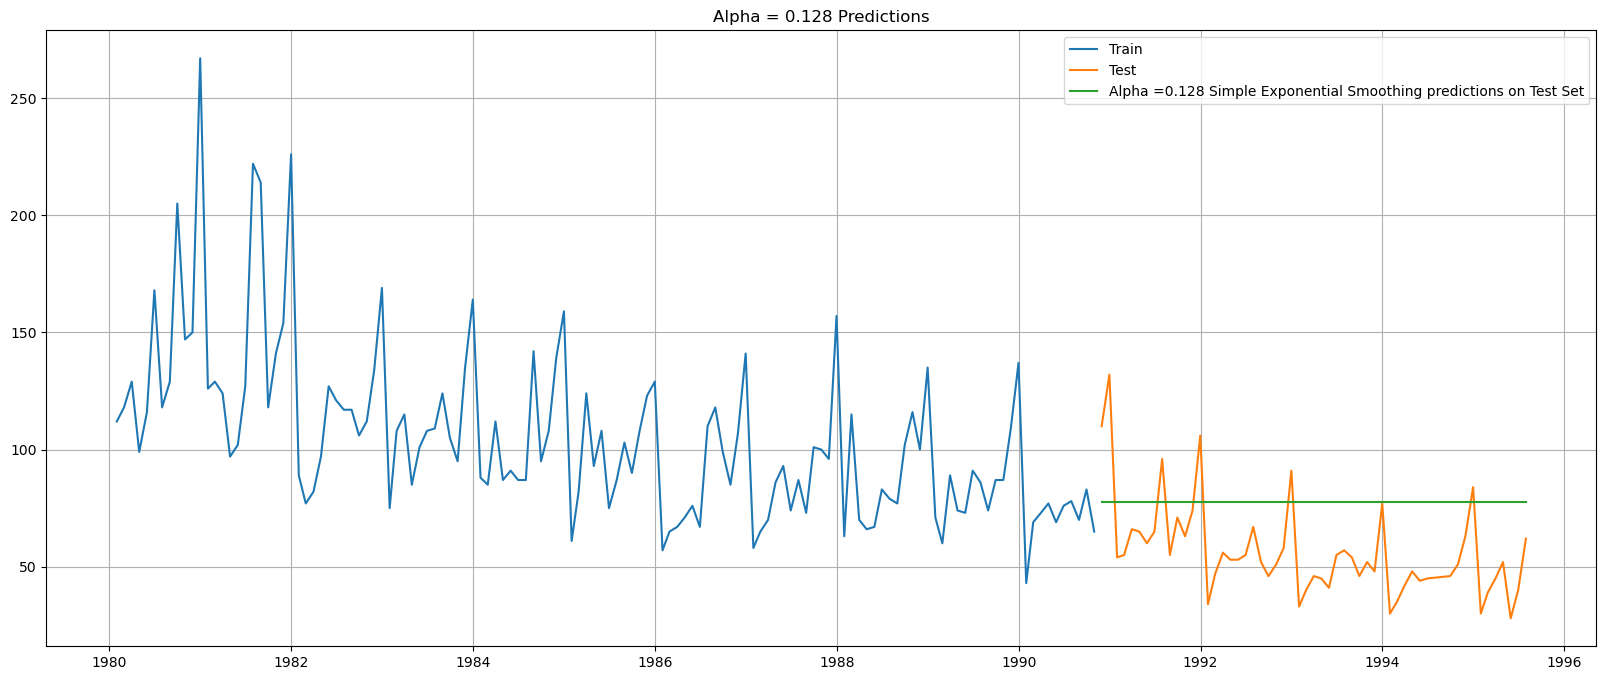

In [73]:

plt.plot(train_rose['Rose'], label='Train')
plt.plot(test_rose['Rose'], label='Test')

plt.plot(SES_predict_rose, label='Alpha =0.128 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.128 Predictions');

In [74]:
from sklearn.metrics import  mean_squared_error

In [75]:
ses_rose_RSME = mean_squared_error(test_rose['Rose'].values,SES_predict_rose.values,squared=False)

In [76]:
print('SES RMSE:',mean_squared_error(test_rose['Rose'].values,SES_predict_rose.values,squared=False))

SES RMSE: 29.223468118176164


In [77]:
SES_DF = pd.DataFrame({'Test RMSE': ses_rose_RSME},index=['Alpha=0.128,Simple Exponentital Smoothing'])

In [78]:
Eval_DF = pd.concat([Eval_DF, SES_DF])
Eval_DF

Test RMSE
Linear Regression                          17.355787
SimpleAverageModel                         52.411878
2pointTrailingMovingAverage                11.801043
4pointTrailingMovingAverage                15.367176
6pointTrailingMovingAverage                15.862298
9pointTrailingMovingAverage                16.341888
Alpha=0.128,Simple Exponentital Smoothing  29.223468

# Double Exp smoothing

In [79]:
model_DES_rose = Holt(train_rose['Rose'],initialization_method='estimated')

model_DES_rose = model_DES_rose.fit()

print('Double Exp smoothing')
print(model_DES_rose.params)

Double Exp smoothing
{'smoothing_level': 4.3228814168489945e-07, 'smoothing_trend': 1.1863431936839864e-07, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 139.37639812604982, 'initial_trend': -0.529318269973793, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\ebyeb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [80]:
DES_predict_rose =  model_DES_rose.forecast(len(test_rose))
DES_predict_rose

1990-11-30    70.035704
1990-12-31    69.506386
1991-01-31    68.977067
1991-02-28    68.447749
1991-03-31    67.918431
1991-04-30    67.389113
1991-05-31    66.859794
1991-06-30    66.330476
1991-07-31    65.801158
1991-08-31    65.271840
1991-09-30    64.742521
1991-10-31    64.213203
1991-11-30    63.683885
1991-12-31    63.154566
1992-01-31    62.625248
1992-02-29    62.095930
1992-03-31    61.566612
1992-04-30    61.037293
1992-05-31    60.507975
1992-06-30    59.978657
1992-07-31    59.449339
1992-08-31    58.920020
1992-09-30    58.390702
1992-10-31    57.861384
1992-11-30    57.332066
1992-12-31    56.802747
1993-01-31    56.273429
1993-02-28    55.744111
1993-03-31    55.214792
1993-04-30    54.685474
1993-05-31    54.156156
1993-06-30    53.626838
1993-07-31    53.097519
1993-08-31    52.568201
1993-09-30    52.038883
1993-10-31    51.509565
1993-11-30    50.980246
1993-12-31    50.450928
1994-01-31    49.921610
1994-02-28    49.392291
1994-03-31    48.862973
1994-04-30    48

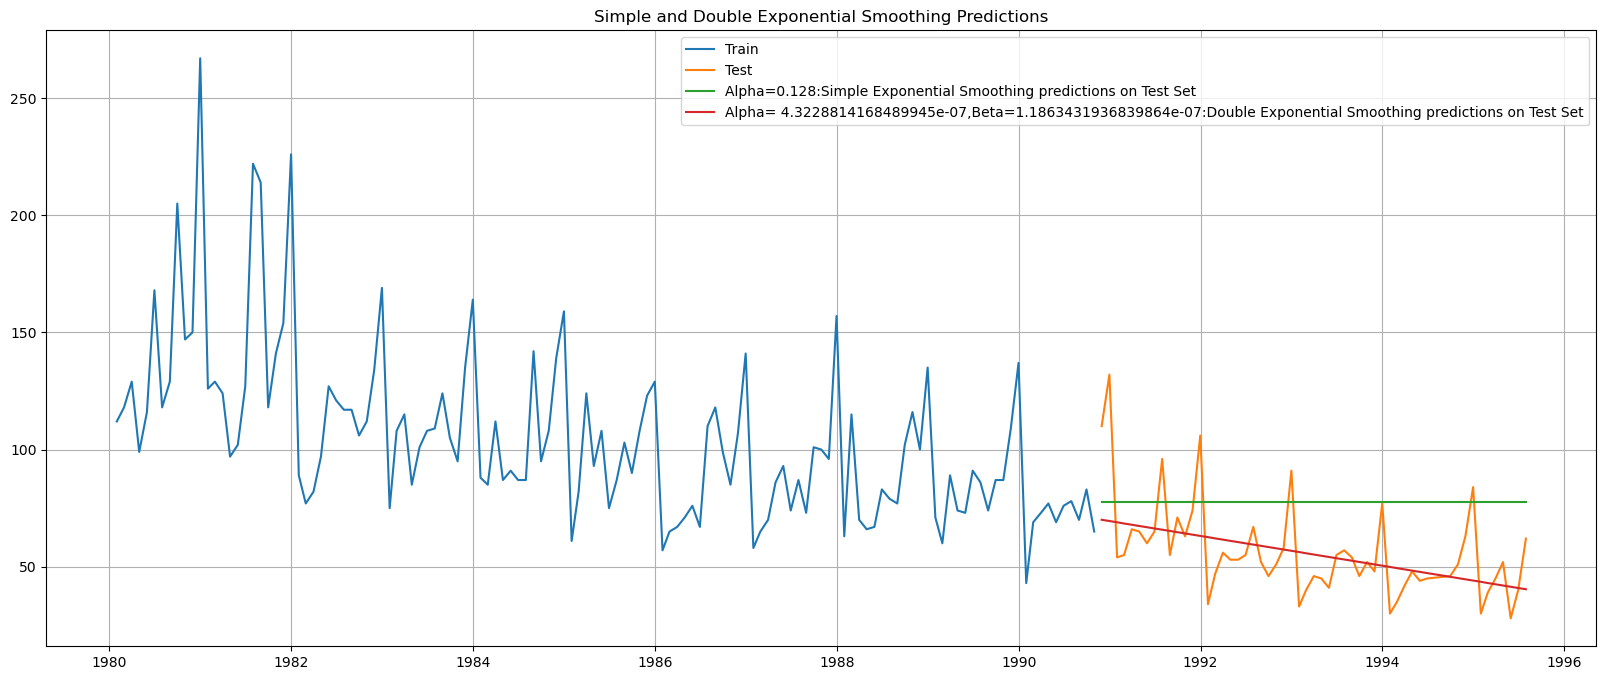

In [81]:
plt.plot(train_rose['Rose'], label='Train')
plt.plot(test_rose['Rose'], label='Test')

plt.plot(SES_predict_rose, label='Alpha=0.128:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_rose, label='Alpha= 4.3228814168489945e-07,Beta=1.1863431936839864e-07:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

In [82]:
rsme_des = mean_squared_error(test_rose['Rose'].values,DES_predict_rose.values,squared=False)

In [83]:
des_df =  pd.DataFrame({'Test RMSE': rsme_des},index=['Alpha= 4.3228814168489945e-07,Beta=1.1863431936839864e-07:Double Exponential Smoothing'])

In [84]:
Eval_DF = pd.concat([Eval_DF, des_df])
Eval_DF

Test RMSE
Linear Regression                                   17.355787
SimpleAverageModel                                  52.411878
2pointTrailingMovingAverage                         11.801043
4pointTrailingMovingAverage                         15.367176
6pointTrailingMovingAverage                         15.862298
9pointTrailingMovingAverage                         16.341888
Alpha=0.128,Simple Exponentital Smoothing           29.223468
Alpha= 4.3228814168489945e-07,Beta=1.1863431936...  17.355546

# Triple Exp Smoothing

In [85]:
train_rose_TES = train_rose.copy()
test_rose_TES = test_rose.copy()

In [86]:
model_tes_ta_sa = ExponentialSmoothing(train_rose_TES['Rose'],trend='additive',seasonal='additive')
model_tes_ta_sm = ExponentialSmoothing(train_rose_TES['Rose'],trend='additive',seasonal='multiplicative')
model_tes_tm_sm = ExponentialSmoothing(train_rose_TES['Rose'],trend='multiplicative',seasonal='multiplicative')
model_tes_tm_sa = ExponentialSmoothing(train_rose_TES['Rose'],trend='multiplicative',seasonal='additive')

C:\Users\ebyeb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\ebyeb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\ebyeb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\ebyeb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [87]:
model_tes_fit_ta_sa = model_tes_ta_sa.fit(optimized=True)
model_tes_fit_ta_sm = model_tes_ta_sm.fit(optimized=True)
model_tes_fit_tm_sm = model_tes_tm_sm.fit(optimized=True)
model_tes_fit_tm_sa = model_tes_tm_sa.fit(optimized=True)

C:\Users\ebyeb\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\ebyeb\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [88]:
results_TES = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[]})

In [89]:
test_rose_TES['predict_ta_sa'] =model_tes_fit_ta_sa.forecast(len(test_rose_TES))
test_rose_TES['predict_ta_sm']=model_tes_fit_ta_sm.forecast(len(test_rose_TES))
test_rose_TES['predict_tm_sm']=model_tes_fit_tm_sm.forecast(len(test_rose_TES))
test_rose_TES['predict_tm_sa']=model_tes_fit_tm_sa.forecast(len(test_rose_TES))

In [90]:
rsme_ta_sa = mean_squared_error(test_rose_TES['Rose'].values,test_rose_TES['predict_ta_sa'].values,squared=False)
rsme_ta_sm = mean_squared_error(test_rose_TES['Rose'].values,test_rose_TES['predict_ta_sm'].values,squared=False)
rsme_tm_sm = mean_squared_error(test_rose_TES['Rose'].values,test_rose_TES['predict_tm_sm'].values,squared=False)
rsme_tm_sa = mean_squared_error(test_rose_TES['Rose'].values,test_rose_TES['predict_tm_sa'].values,squared=False)


In [91]:
model_tes_fit_ta_sa.params

{'smoothing_level': 0.08808451025314779,
 'smoothing_trend': 0.00010195127285726443,
 'smoothing_seasonal': 0.0018138637576130025,
 'damping_trend': nan,
 'initial_level': 146.81409287235113,
 'initial_trend': -0.5554042754470411,
 'initial_seasons': array([-31.16556612, -18.78286869, -10.8111508 , -21.36232035,
        -12.56088077,  -7.16384923,   2.74297812,   8.84205988,
          4.8652509 ,   3.0332219 ,  19.62015059,  63.88595531]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [92]:
model_tes_fit_ta_sm.params

{'smoothing_level': 0.09941326775571543,
 'smoothing_trend': 2.4733033543760145e-09,
 'smoothing_seasonal': 2.2407585658472406e-07,
 'damping_trend': nan,
 'initial_level': 159.83733634496218,
 'initial_trend': -0.6452822286294049,
 'initial_seasons': array([0.68601845, 0.77534772, 0.84776999, 0.74348018, 0.83458381,
        0.89900006, 0.98970025, 1.05839694, 0.99093964, 0.97471991,
        1.12073306, 1.54535628]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [93]:
model_tes_fit_tm_sm.params

{'smoothing_level': 0.06880555101690582,
 'smoothing_trend': 3.1591445749774205e-05,
 'smoothing_seasonal': 0.000659396197537512,
 'damping_trend': nan,
 'initial_level': 128.51452563740185,
 'initial_trend': 0.9937587620453284,
 'initial_seasons': array([0.86918775, 0.98427347, 1.0771224 , 0.94339492, 1.05963454,
        1.14438699, 1.258568  , 1.3447829 , 1.2672531 , 1.24228884,
        1.43132757, 1.97661992]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [94]:
model_tes_fit_tm_sa.params

{'smoothing_level': 2.9232996057374927e-06,
 'smoothing_trend': 8.934448500514274e-18,
 'smoothing_seasonal': 4.4833903052027145e-06,
 'damping_trend': nan,
 'initial_level': 135.78728893702726,
 'initial_trend': 0.9938468956304268,
 'initial_seasons': array([-19.41921121,  -6.90721253,   1.16203976,  -9.23619857,
         -0.47475823,   4.72422366,  14.90307322,  20.83252784,
         16.88802148,  15.07274326,  32.33774116,  75.76875386]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [95]:
tes_ta_sa = pd.DataFrame({'Test RMSE': rsme_ta_sa },index=['Alpha= 0.088,Beta=0.0001,Gamma = 0.0018:TES_TA_SA '])
tes_ta_sm = pd.DataFrame({'Test RMSE': rsme_ta_sm },index=['Alpha= 0.099,Beta=0.0000000024,Gamma = 0.00000024:TES_TA_SM '])
tes_tm_sm = pd.DataFrame({'Test RMSE': rsme_tm_sm },index=['Alpha= 0.06,Beta=0.00003,Gamma = 0.000659:TES_TM_SM '])
tes_tm_sa = pd.DataFrame({'Test RMSE': rsme_tm_sa },index=['Alpha= 0.00000029,Beta=0.0000000000000000008,Gamma = 0.000004:TES_TM_SA '])


In [96]:
Eval_DF = pd.concat([Eval_DF, tes_ta_sa ,tes_ta_sm, tes_tm_sm,tes_tm_sa])
Eval_DF

Test RMSE
Linear Regression                                   17.355787
SimpleAverageModel                                  52.411878
2pointTrailingMovingAverage                         11.801043
4pointTrailingMovingAverage                         15.367176
6pointTrailingMovingAverage                         15.862298
9pointTrailingMovingAverage                         16.341888
Alpha=0.128,Simple Exponentital Smoothing           29.223468
Alpha= 4.3228814168489945e-07,Beta=1.1863431936...  17.355546
Alpha= 0.088,Beta=0.0001,Gamma = 0.0018:TES_TA_SA   13.956491
Alpha= 0.099,Beta=0.0000000024,Gamma = 0.000000...   9.325407
Alpha= 0.06,Beta=0.00003,Gamma = 0.000659:TES_T...  11.725478
Alpha= 0.00000029,Beta=0.0000000000000000008,Ga...  15.662454

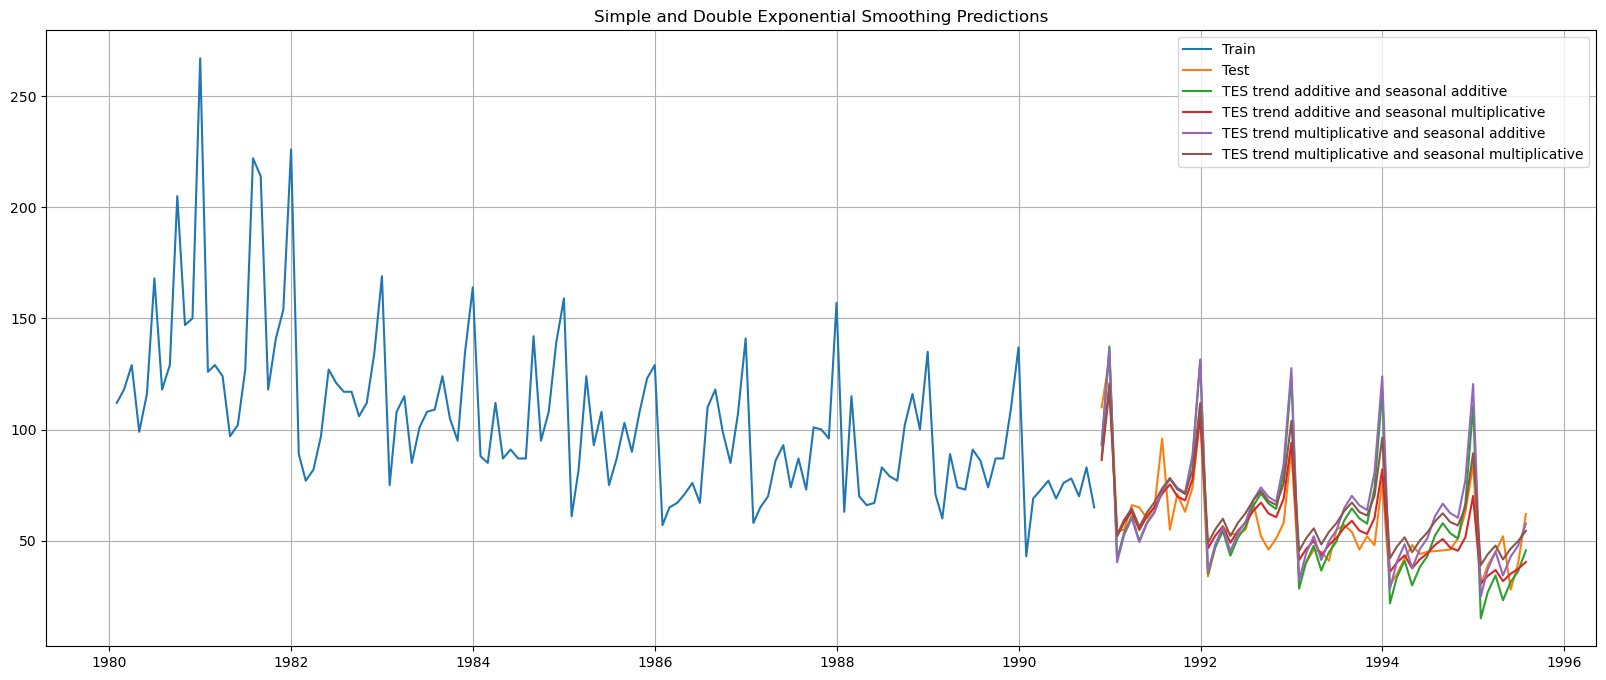

In [97]:
plt.plot(train_rose['Rose'], label='Train')
plt.plot(test_rose['Rose'], label='Test')

plt.plot(test_rose_TES['predict_ta_sa'], label='TES trend additive and seasonal additive')
plt.plot(test_rose_TES['predict_ta_sm'], label='TES trend additive and seasonal multiplicative')
plt.plot(test_rose_TES['predict_tm_sa'], label='TES trend multiplicative and seasonal additive')
plt.plot(test_rose_TES['predict_tm_sm'], label='TES trend multiplicative and seasonal multiplicative')
plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

# Check for Stationarity

Null Hypothesis H0 : Time Series is non-stationary.


Alternate Hypothesis Ha : Time Series is stationary.

In [98]:
from statsmodels.tsa.stattools import adfuller

In [99]:
dftest = adfuller(data_rose['Rose'])#python implementation of dicky fuller test 
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is -1.877
DF test p-value is 0.3431


In [100]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

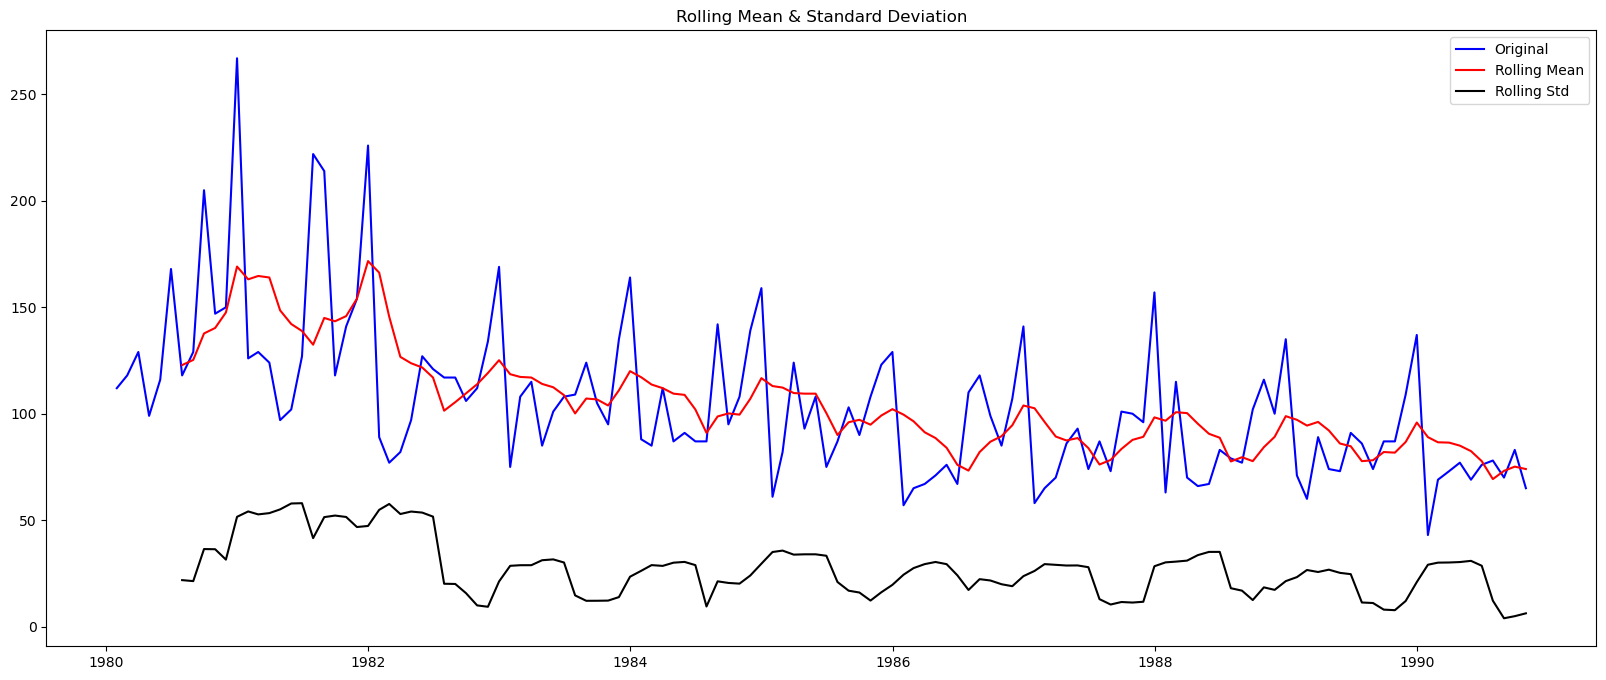

Results of Dickey-Fuller Test:
Test Statistic                  -1.939916
p-value                          0.313523
#Lags Used                      13.000000
Number of Observations Used    116.000000
Critical Value (1%)             -3.488022
Critical Value (5%)             -2.886797
Critical Value (10%)            -2.580241
dtype: float64 



In [101]:
test_stationarity(train_rose['Rose'])

## Data is non stationary

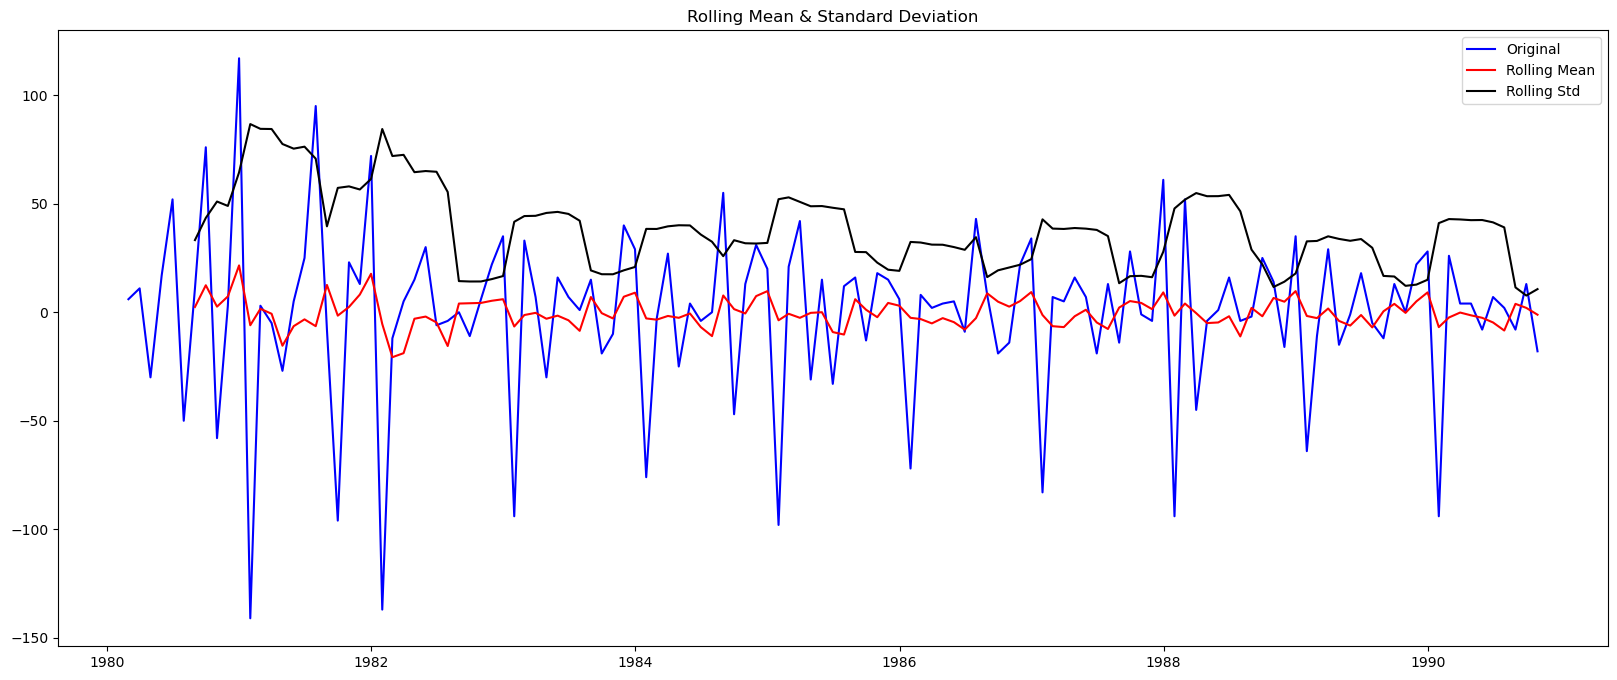

Results of Dickey-Fuller Test:
Test Statistic                -6.486071e+00
p-value                        1.260009e-08
#Lags Used                     1.200000e+01
Number of Observations Used    1.160000e+02
Critical Value (1%)           -3.488022e+00
Critical Value (5%)           -2.886797e+00
Critical Value (10%)          -2.580241e+00
dtype: float64 



In [102]:
test_stationarity(train_rose['Rose'].diff().dropna())

<Axes: xlabel='Year_Month'>

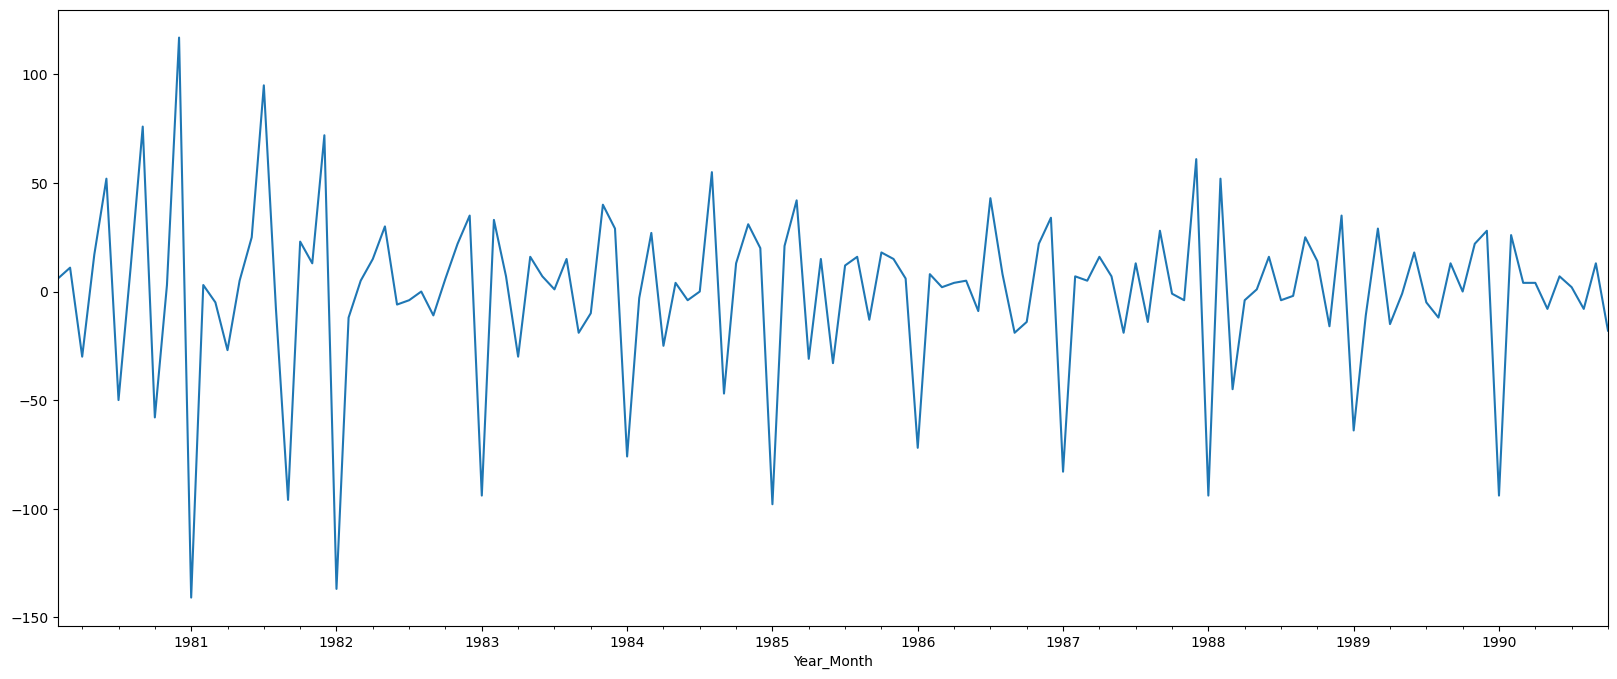

In [103]:
train_diff = train_rose['Rose'].diff().dropna()
train_diff.plot()

Model Building - Stationary Data

    Generate ACF & PACF Plot and find the AR, MA values. - Build different ARIMA models - Auto ARIMA - Manual ARIMA - Build different SARIMA models - Auto SARIMA - Manual SARIMA - Check the performance of the models built



In [104]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


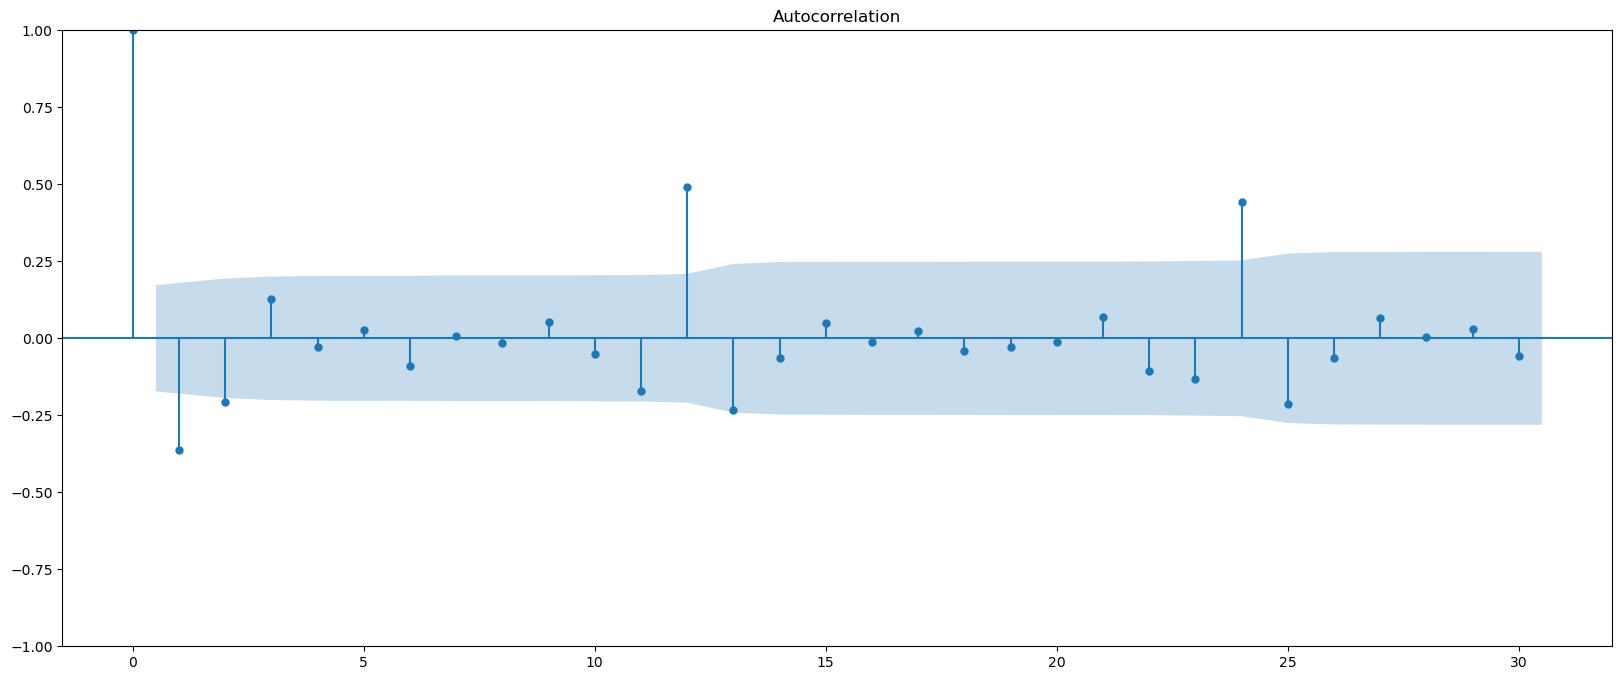

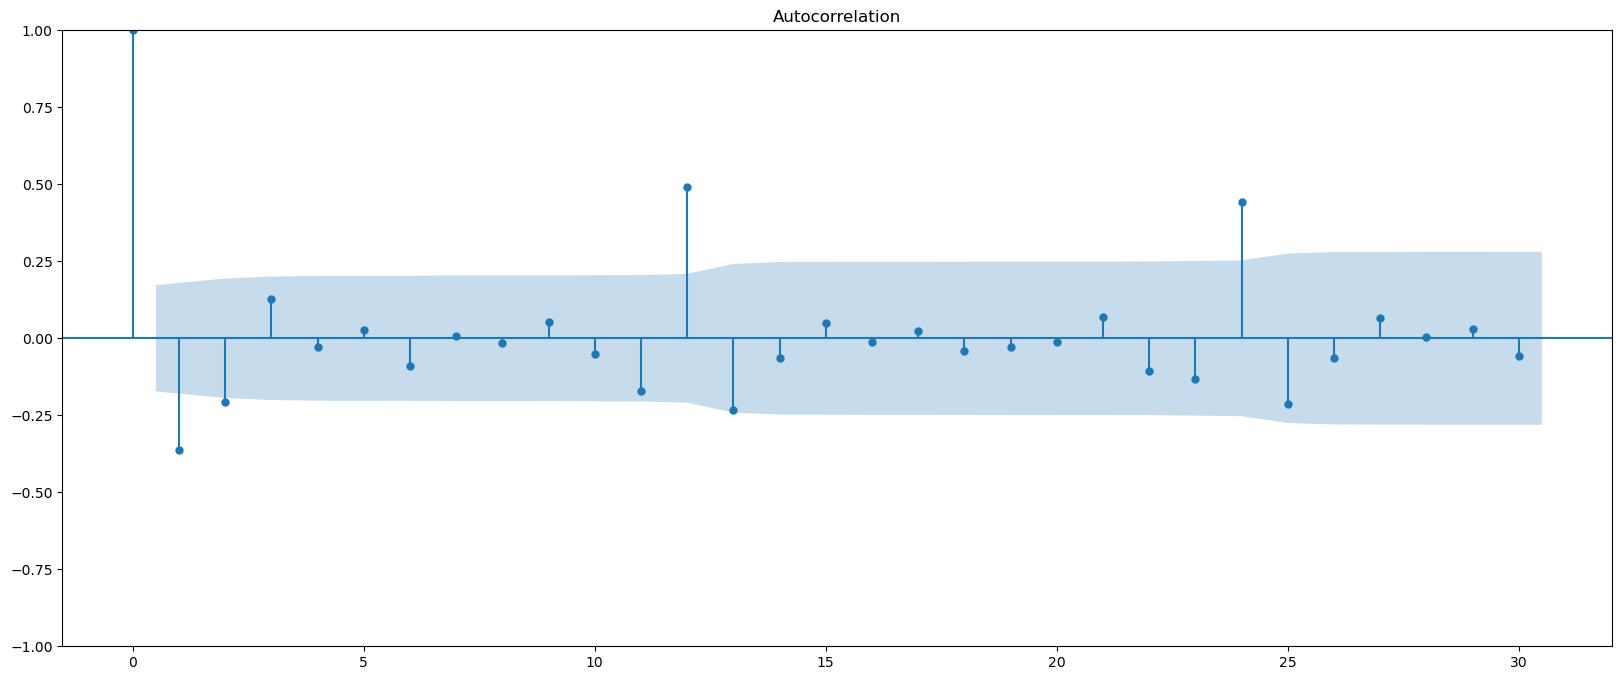

In [105]:
plot_acf(train_diff,lags=30)


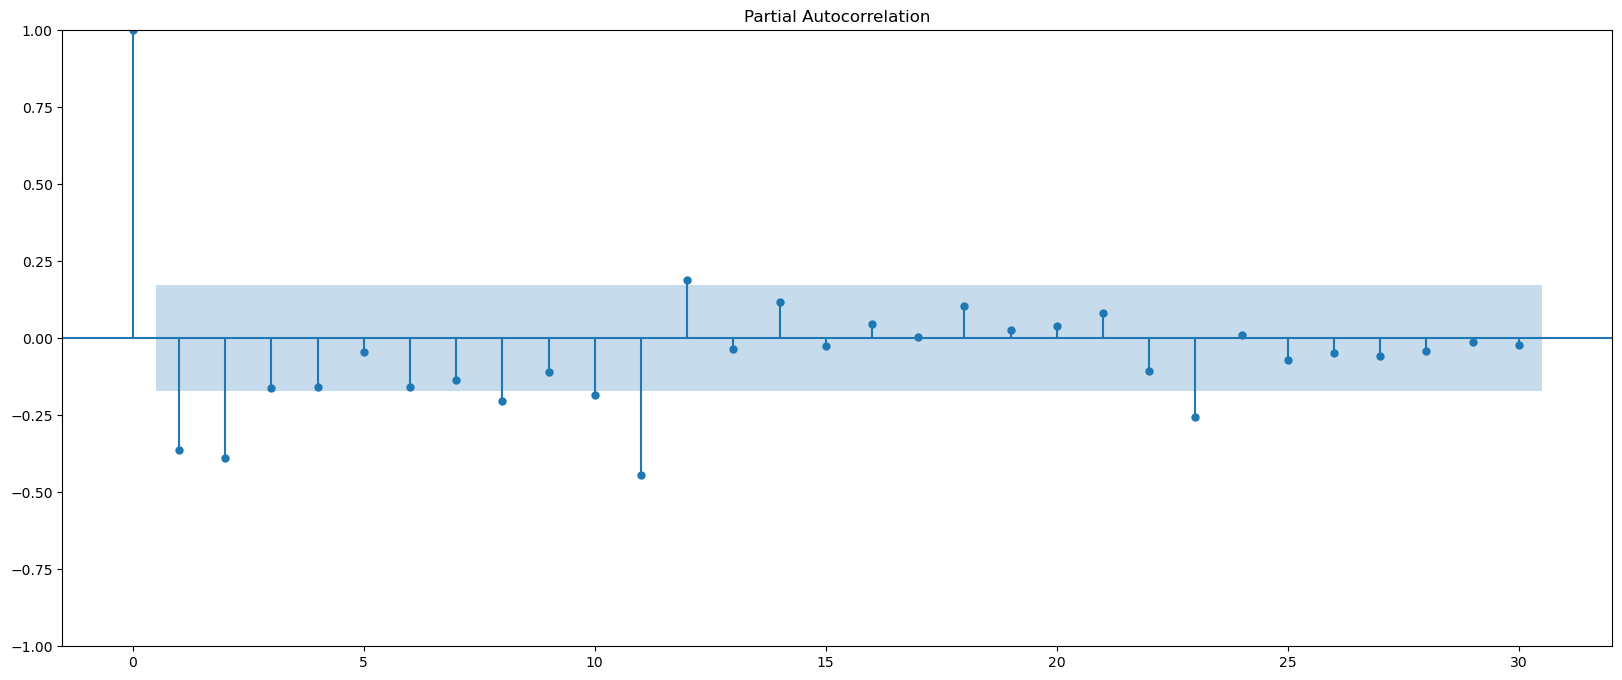

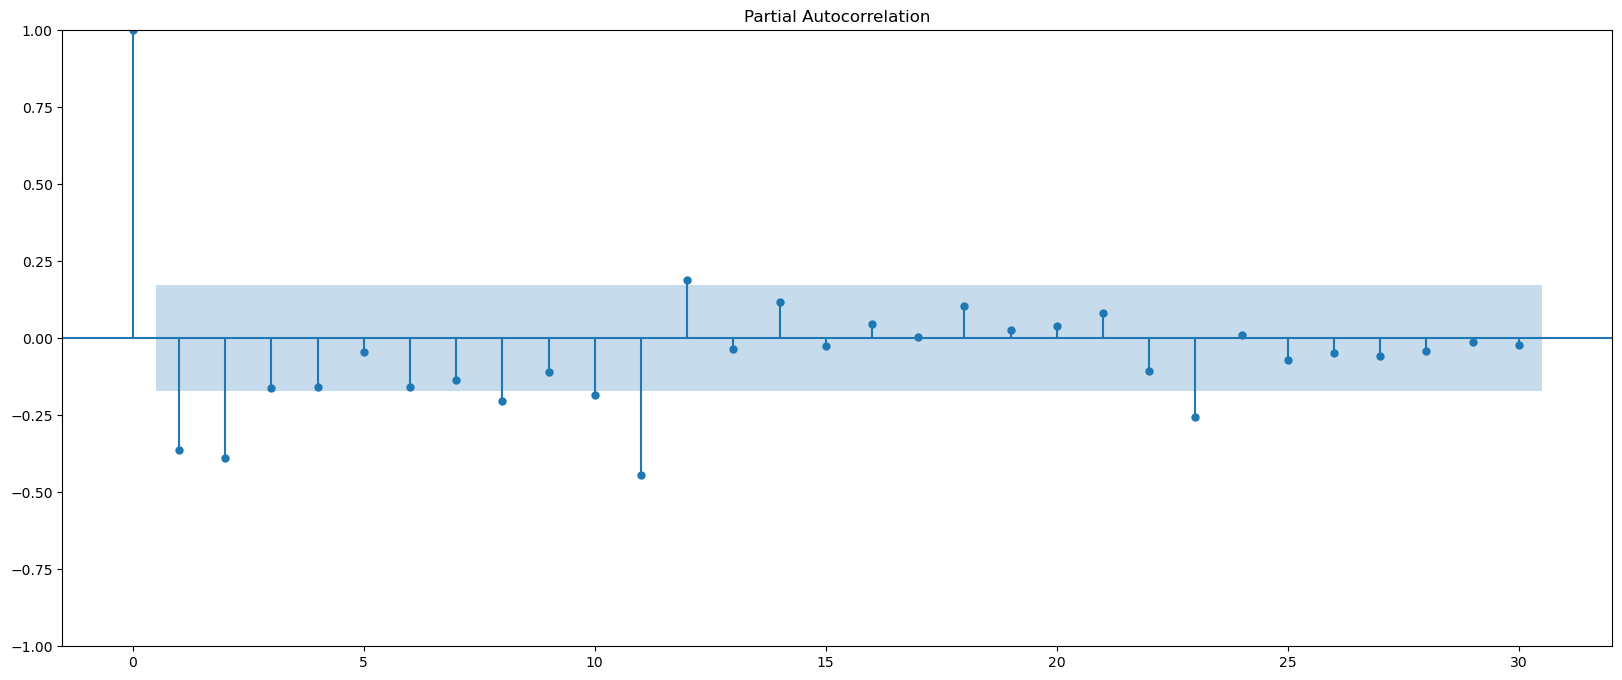

In [106]:
plot_pacf(train_diff, lags = 30)

Value of , p and q between 0 and 2

In [107]:
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [108]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [109]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train_rose['Rose'],order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

C:\Users\ebyeb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\ebyeb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\ebyeb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 0) - AIC:1313.1758613526429
ARIMA(0, 1, 1) - AIC:1261.32744384058


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\1042540760.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\ebyeb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\ebyeb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\ebyeb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\1042540760.py:6: FutureWarning: The frame.ap

ARIMA(0, 1, 2) - AIC:1259.2477803151232
ARIMA(1, 1, 0) - AIC:1297.077294384856
ARIMA(1, 1, 1) - AIC:1260.0367627036358
ARIMA(1, 1, 2) - AIC:1259.4732049501204


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\1042540760.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\ebyeb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\ebyeb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\ebyeb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\1042540760.py:6: FutureWarning: The frame.ap

ARIMA(2, 1, 0) - AIC:1278.135280748431
ARIMA(2, 1, 1) - AIC:1261.0140762917006
ARIMA(2, 1, 2) - AIC:1261.4720006569023


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\1042540760.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\ebyeb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\ebyeb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\ebyeb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\1042540760.py:6: FutureWarning: The frame.ap

In [110]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
2  (0, 1, 2)  1259.247780
5  (1, 1, 2)  1259.473205
4  (1, 1, 1)  1260.036763
7  (2, 1, 1)  1261.014076
1  (0, 1, 1)  1261.327444
8  (2, 1, 2)  1261.472001
6  (2, 1, 0)  1278.135281
3  (1, 1, 0)  1297.077294
0  (0, 1, 0)  1313.175861

In [111]:
auto_ARIMA = ARIMA(train_rose['Rose'],order =(0,1,2),freq= 'M')
results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\ebyeb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  130
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -626.624
Date:                Sun, 17 Mar 2024   AIC                           1259.248
Time:                        14:22:59   BIC                           1267.827
Sample:                    01-31-1980   HQIC                          1262.734
                         - 10-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7059      0.072     -9.851      0.000      -0.846      -0.565
ma.L2         -0.1915      0.074     -2.574      0.010      -0.337      -0.046
sigma2       958.5998     86.875     11.034      0.0

In [112]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test_rose))

In [113]:
rmse_auto = mean_squared_error(test_rose['Rose'],predicted_auto_ARIMA,squared=False)
print(rmse_auto)

30.90359333134995


In [114]:
auto_arima = pd.DataFrame({'Test RMSE': rmse_auto },index=['Auto Arima (1,1,2)'])

In [115]:
Eval_DF = pd.concat([Eval_DF,auto_arima])
Eval_DF

Test RMSE
Linear Regression                                   17.355787
SimpleAverageModel                                  52.411878
2pointTrailingMovingAverage                         11.801043
4pointTrailingMovingAverage                         15.367176
6pointTrailingMovingAverage                         15.862298
9pointTrailingMovingAverage                         16.341888
Alpha=0.128,Simple Exponentital Smoothing           29.223468
Alpha= 4.3228814168489945e-07,Beta=1.1863431936...  17.355546
Alpha= 0.088,Beta=0.0001,Gamma = 0.0018:TES_TA_SA   13.956491
Alpha= 0.099,Beta=0.0000000024,Gamma = 0.000000...   9.325407
Alpha= 0.06,Beta=0.00003,Gamma = 0.000659:TES_T...  11.725478
Alpha= 0.00000029,Beta=0.0000000000000000008,Ga...  15.662454
Auto Arima (1,1,2)                                  30.903593

# Auto Sarima

In [116]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [117]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [118]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train_rose['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1303.984314159292


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1127.032318512217


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:956.4131665692057
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1121.3977282304234
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1097.166579524714


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:950.6998497228399
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:941.2946512703303
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:943.2558966541932


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:936.3148887531331
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1242.5766056799903
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1079.9832204946617


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:904.3132399734136
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1078.2285176554606
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1035.7241510279284


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:901.6481142949839
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:897.583735574391


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:898.6607999294711


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:884.385076841152
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:1231.231414538895
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1065.389179967098


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:894.4419226275885
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1071.6440642890639


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1026.7446561809058


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:888.1231053553599
SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:895.8772183601807


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:897.330095946716


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:871.0752383372055
SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:1287.8863498975584
SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1117.0161467241542
SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:943.5830348969494


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\ebyeb\AppData\Local\Te

SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1106.4720677346975
SARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1086.8367200390392


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:939.0945779695287
SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:919.9038293903103


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 0, 1, 12) - AIC:921.8570502213613


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:923.4855356926284
SARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:1241.6300492575124
SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1076.1592752570657


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:903.9456130482092
SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1066.1584467973264


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1035.7723005491446


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:899.5130609044714
SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:888.7495145596065


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:890.3875310825209


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:883.6660397652643
SARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:1231.5587519588057


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 0, 1, 12) - AIC:1067.384114920341


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 0, 2, 12) - AIC:896.4380105298549
SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:1064.1976586974167


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:1024.1455723581912


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:890.0396977468133


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:889.0946819312553


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:890.6421556547588


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:873.0038755932845
SARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC:1259.7833248707425
SARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC:1110.4741741739683


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:938.0326522143433
SARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:1081.4099214593243
SARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:1057.6713554219518


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:932.3204745301138
SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:905.5948860010852


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:907.2330623206813


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:909.1483851063525
SARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC:1242.7200244070896


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:1075.9999714658697


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:904.0090522250346
SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:1054.365902113301


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1034.3832672132687


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:899.8125434683019


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:879.792363451318


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:881.2073386963309


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:882.9435022271044
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:1233.5045954992477


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1065.6393350964186


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:897.3204213394063
SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1056.2515450530757


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1033.4079813615028


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:890.6376689688194


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:880.7638572023848


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:882.1078735152023


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:874.2139604568139


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\4024192068.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


In [119]:
SARIMA_AIC.sort_values(by=['AIC'])

param       seasonal          AIC
26  (0, 1, 2)  (2, 0, 2, 12)   871.075238
53  (1, 1, 2)  (2, 0, 2, 12)   873.003876
80  (2, 1, 2)  (2, 0, 2, 12)   874.213960
69  (2, 1, 1)  (2, 0, 0, 12)   879.792363
78  (2, 1, 2)  (2, 0, 0, 12)   880.763857
..        ...            ...          ...
9   (0, 1, 1)  (0, 0, 0, 12)  1242.576606
63  (2, 1, 1)  (0, 0, 0, 12)  1242.720024
54  (2, 1, 0)  (0, 0, 0, 12)  1259.783325
27  (1, 1, 0)  (0, 0, 0, 12)  1287.886350
0   (0, 1, 0)  (0, 0, 0, 12)  1303.984314

[81 rows x 3 columns]

In [120]:
import statsmodels.api as sm

auto_SARIMA_12= sm.tsa.statespace.SARIMAX(train_rose['Rose'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  130
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -428.538
Date:                            Sun, 17 Mar 2024   AIC                            871.075
Time:                                    14:23:24   BIC                            889.450
Sample:                                         0   HQIC                           878.516
                                            - 130                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8367    239.185     -0.003      0.997    -469.632     467.958
ma.L2         -0.1633     39.039   

In [121]:
predicted_auto_SARIMA = results_auto_SARIMA_12.forecast(steps=len(test_rose))

In [122]:
rmse_auto_sarima = mean_squared_error(test_rose['Rose'],predicted_auto_SARIMA,squared=False)
print(rmse_auto_sarima)

25.343103581064465


In [123]:
auto_sarima = pd.DataFrame({'Test RMSE': rmse_auto_sarima },index=['Auto SArima (0, 1, 2)x(2, 0, 2, 12) '])

In [124]:
Eval_DF = pd.concat([Eval_DF,auto_sarima])
Eval_DF

Test RMSE
Linear Regression                                   17.355787
SimpleAverageModel                                  52.411878
2pointTrailingMovingAverage                         11.801043
4pointTrailingMovingAverage                         15.367176
6pointTrailingMovingAverage                         15.862298
9pointTrailingMovingAverage                         16.341888
Alpha=0.128,Simple Exponentital Smoothing           29.223468
Alpha= 4.3228814168489945e-07,Beta=1.1863431936...  17.355546
Alpha= 0.088,Beta=0.0001,Gamma = 0.0018:TES_TA_SA   13.956491
Alpha= 0.099,Beta=0.0000000024,Gamma = 0.000000...   9.325407
Alpha= 0.06,Beta=0.00003,Gamma = 0.000659:TES_T...  11.725478
Alpha= 0.00000029,Beta=0.0000000000000000008,Ga...  15.662454
Auto Arima (1,1,2)                                  30.903593
Auto SArima (0, 1, 2)x(2, 0, 2, 12)                 25.343104

# Manual ARIMA

## For manual ARIMA, I would use the cut off points for p, q and d from the ACF and PACF plots

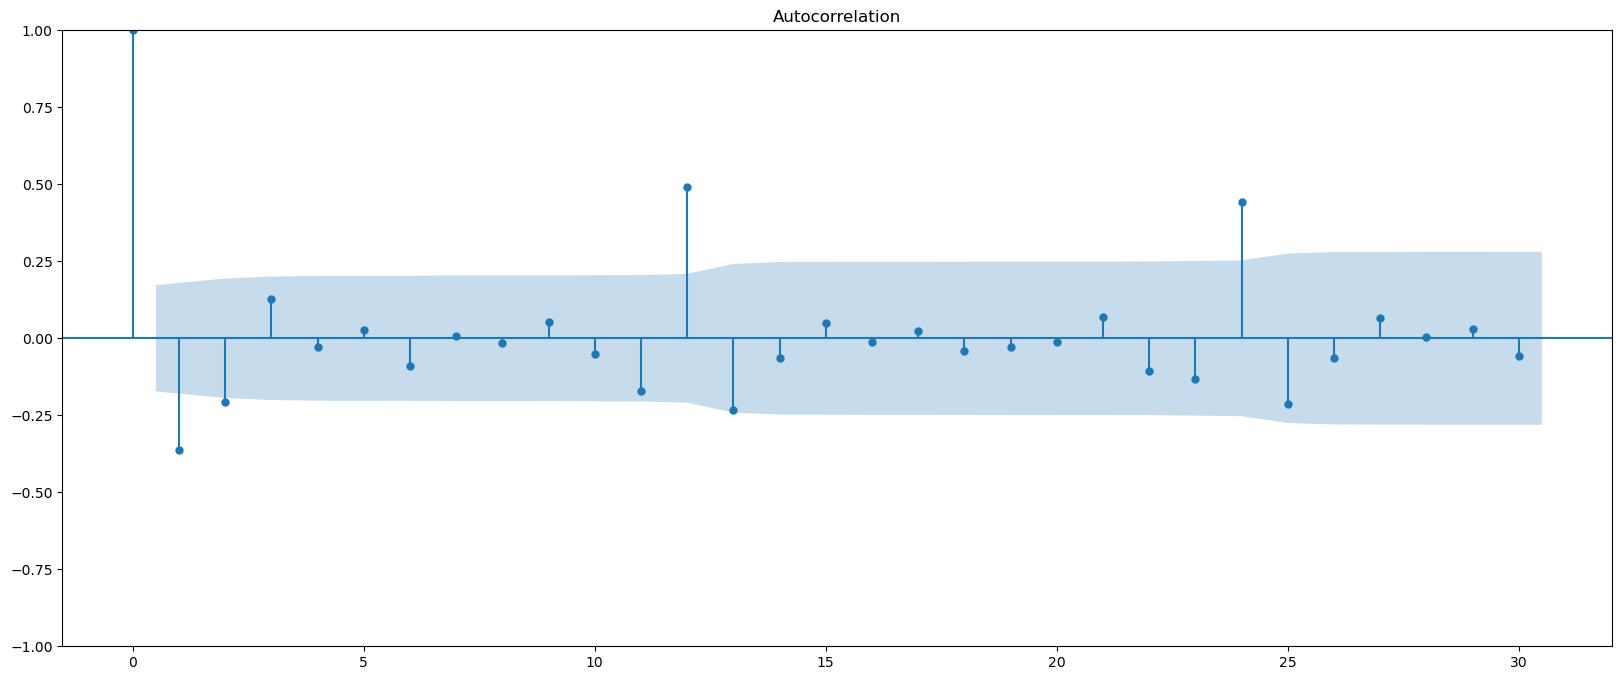

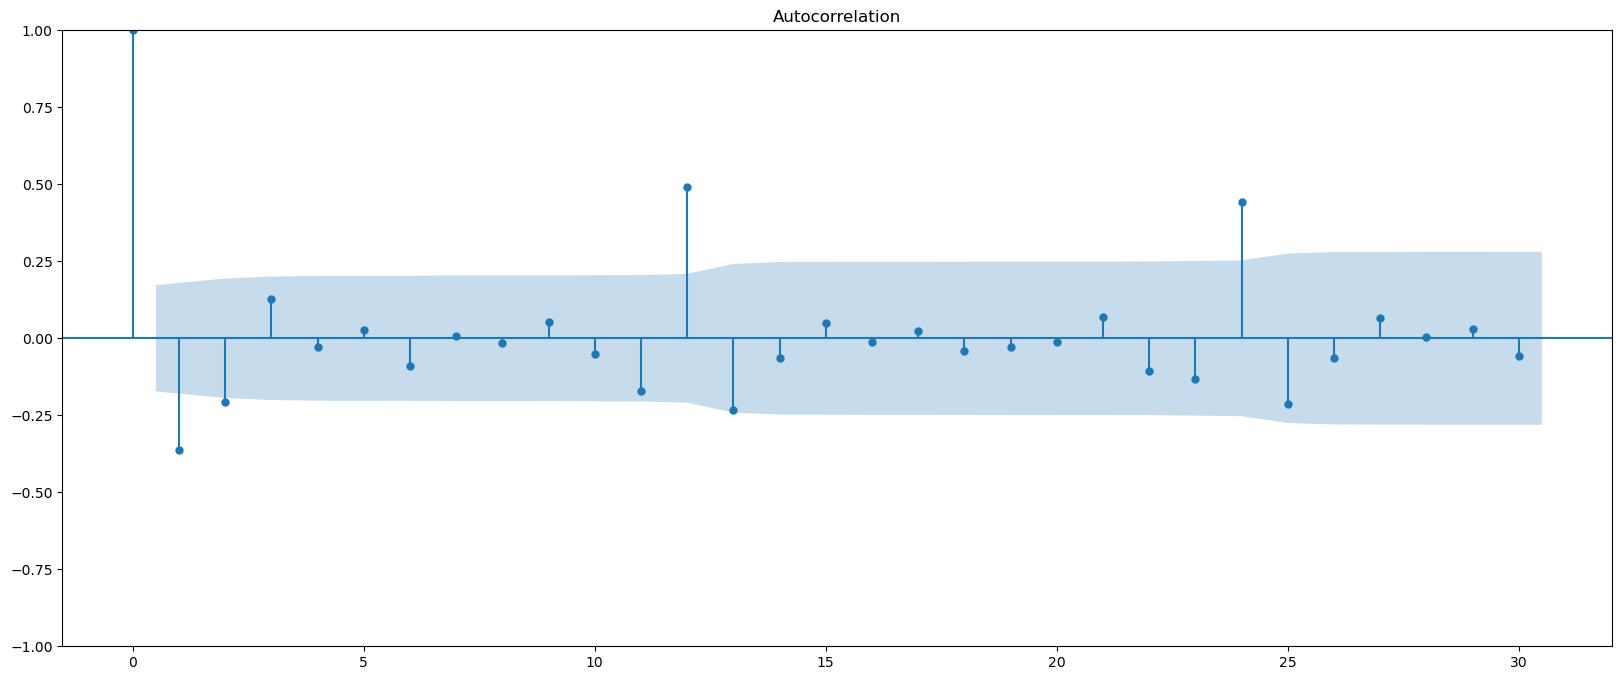

In [125]:
plot_acf(train_diff,lags=30)


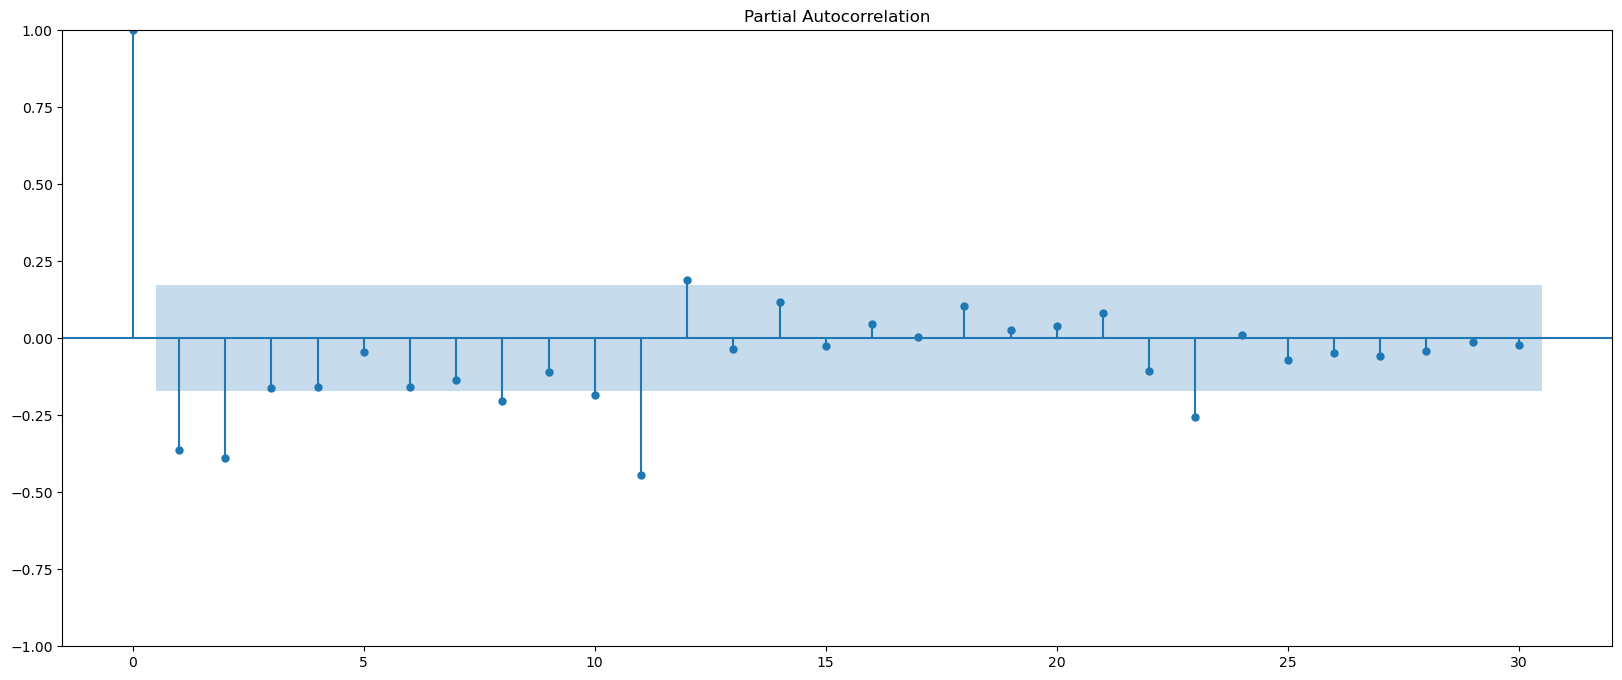

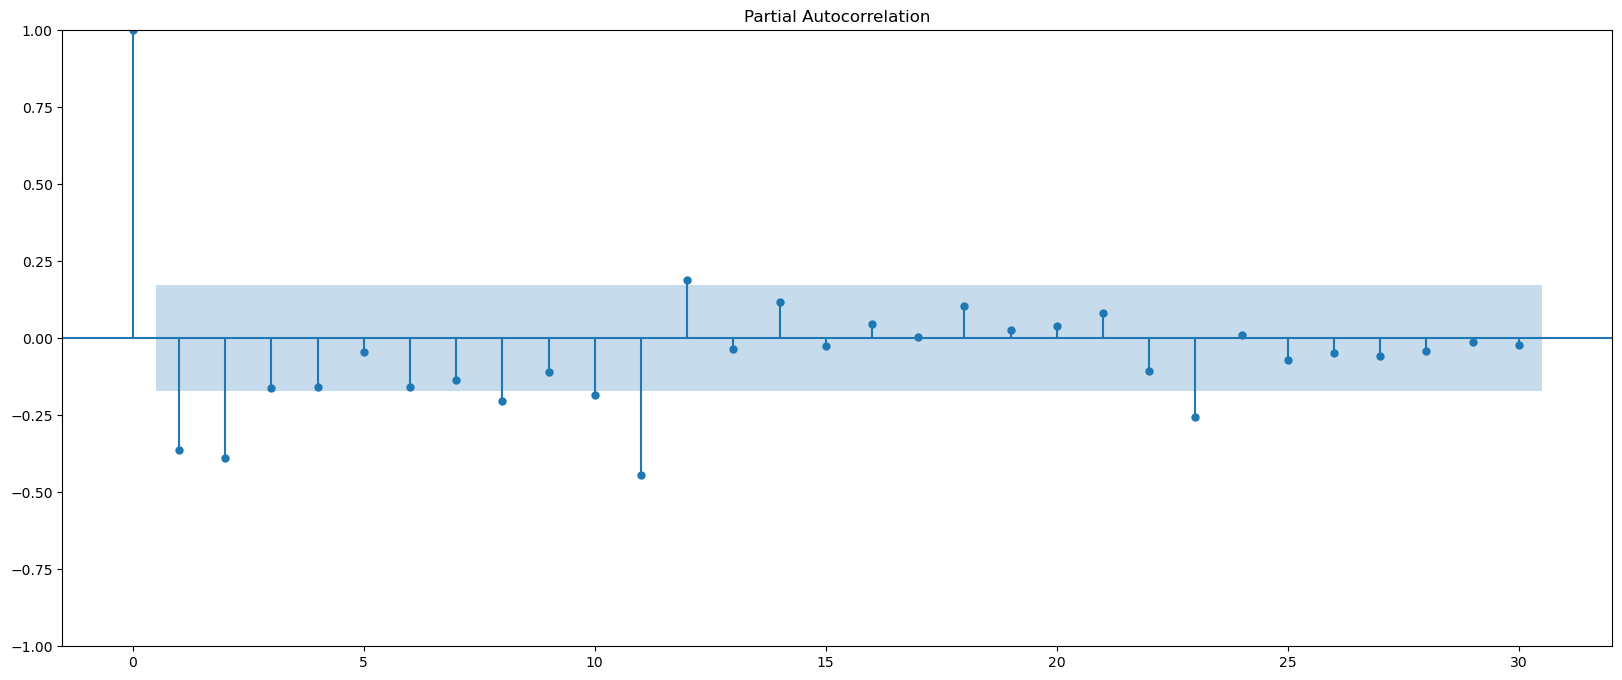

In [126]:
plot_pacf(train_diff, lags = 30)

In [127]:
manual_ARIMA = ARIMA(train_rose['Rose'], order=(1,1,2))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  130
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -625.737
Date:                Sun, 17 Mar 2024   AIC                           1259.473
Time:                        14:23:25   BIC                           1270.912
Sample:                    01-31-1980   HQIC                          1264.121
                         - 10-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4649      0.274     -1.698      0.090      -1.002       0.072
ma.L1         -0.2485      0.253     -0.983      0.326      -0.744       0.247
ma.L2         -0.5971      0.208     -2.874      0.0

C:\Users\ebyeb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\ebyeb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\ebyeb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


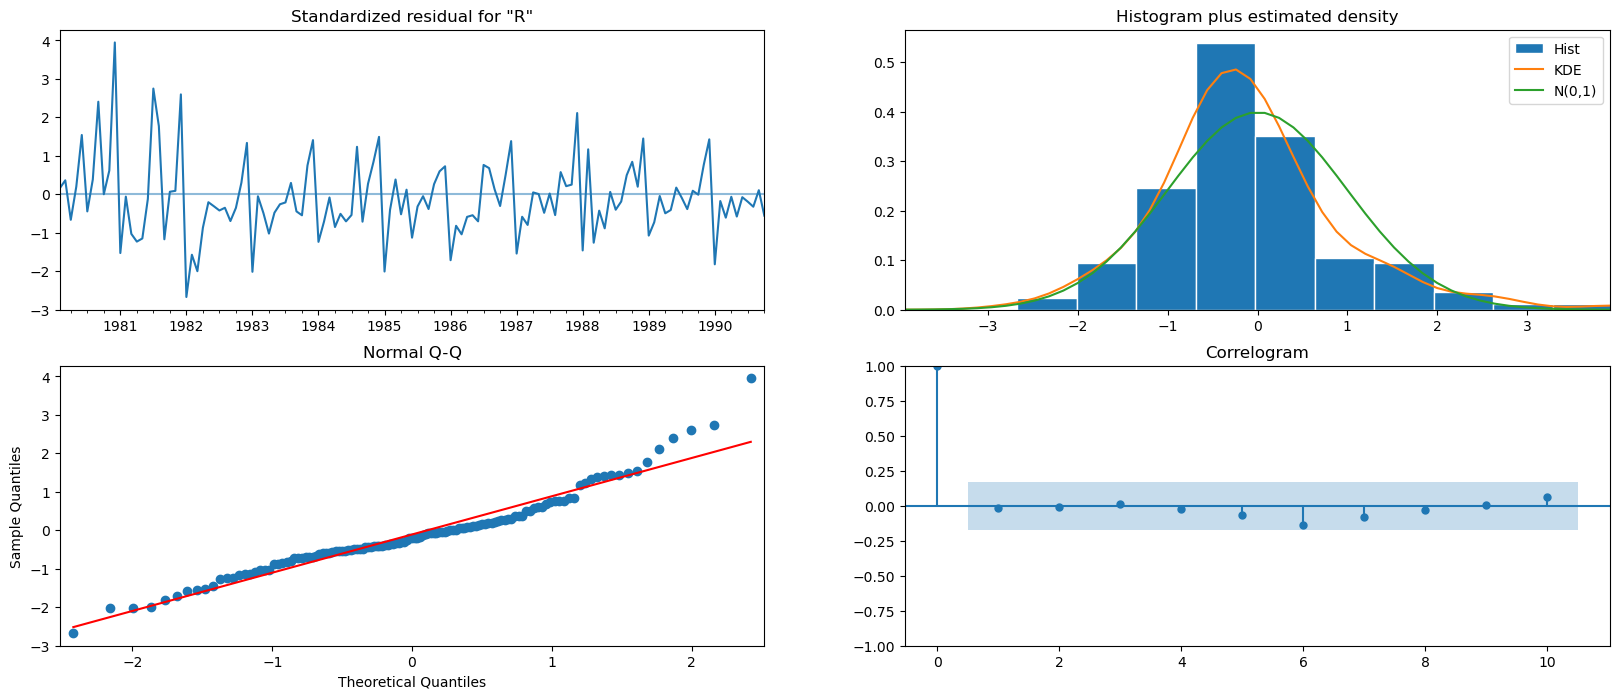

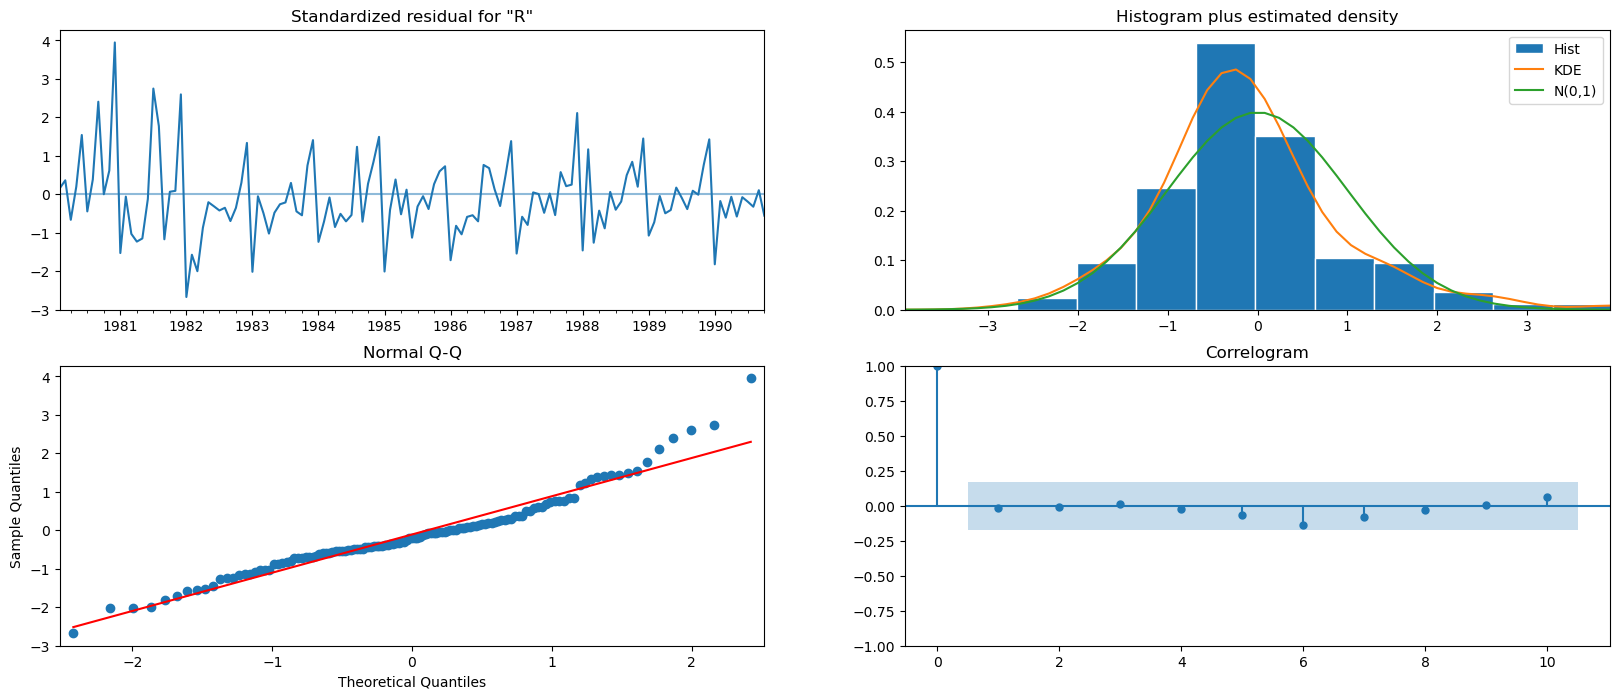

In [128]:

results_manual_ARIMA.plot_diagnostics()

In [129]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test_rose))
rmse_manual_arima= mean_squared_error(test_rose['Rose'],predicted_manual_ARIMA,squared=False)
print('RMSE:',rmse_manual_arima)

RMSE: 30.467871288038857


In [130]:
manual_arima = pd.DataFrame({'Test RMSE': rmse_manual_arima },index=['Manual Arima (1,1,2) '])
Eval_DF = pd.concat([Eval_DF,manual_arima])
Eval_DF

Test RMSE
Linear Regression                                   17.355787
SimpleAverageModel                                  52.411878
2pointTrailingMovingAverage                         11.801043
4pointTrailingMovingAverage                         15.367176
6pointTrailingMovingAverage                         15.862298
9pointTrailingMovingAverage                         16.341888
Alpha=0.128,Simple Exponentital Smoothing           29.223468
Alpha= 4.3228814168489945e-07,Beta=1.1863431936...  17.355546
Alpha= 0.088,Beta=0.0001,Gamma = 0.0018:TES_TA_SA   13.956491
Alpha= 0.099,Beta=0.0000000024,Gamma = 0.000000...   9.325407
Alpha= 0.06,Beta=0.00003,Gamma = 0.000659:TES_T...  11.725478
Alpha= 0.00000029,Beta=0.0000000000000000008,Ga...  15.662454
Auto Arima (1,1,2)                                  30.903593
Auto SArima (0, 1, 2)x(2, 0, 2, 12)                 25.343104
Manual Arima (1,1,2)                                30.467871

# Manual Sarima

In [131]:
manual_SARIMA_12= sm.tsa.statespace.SARIMAX(train_rose['Rose'].values,
                                order=(1, 1, 2),
                                seasonal_order=(1, 1, 2, 11),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_12 = manual_SARIMA_12.fit(maxiter=1000)
print(results_manual_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  130
Model:             SARIMAX(1, 1, 2)x(1, 1, 2, 11)   Log Likelihood                -444.471
Date:                            Sun, 17 Mar 2024   AIC                            902.942
Time:                                    14:23:28   BIC                            920.670
Sample:                                         0   HQIC                           910.100
                                            - 130                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9781      0.026    -36.960      0.000      -1.030      -0.926
ma.L1         -0.0527      0.544   

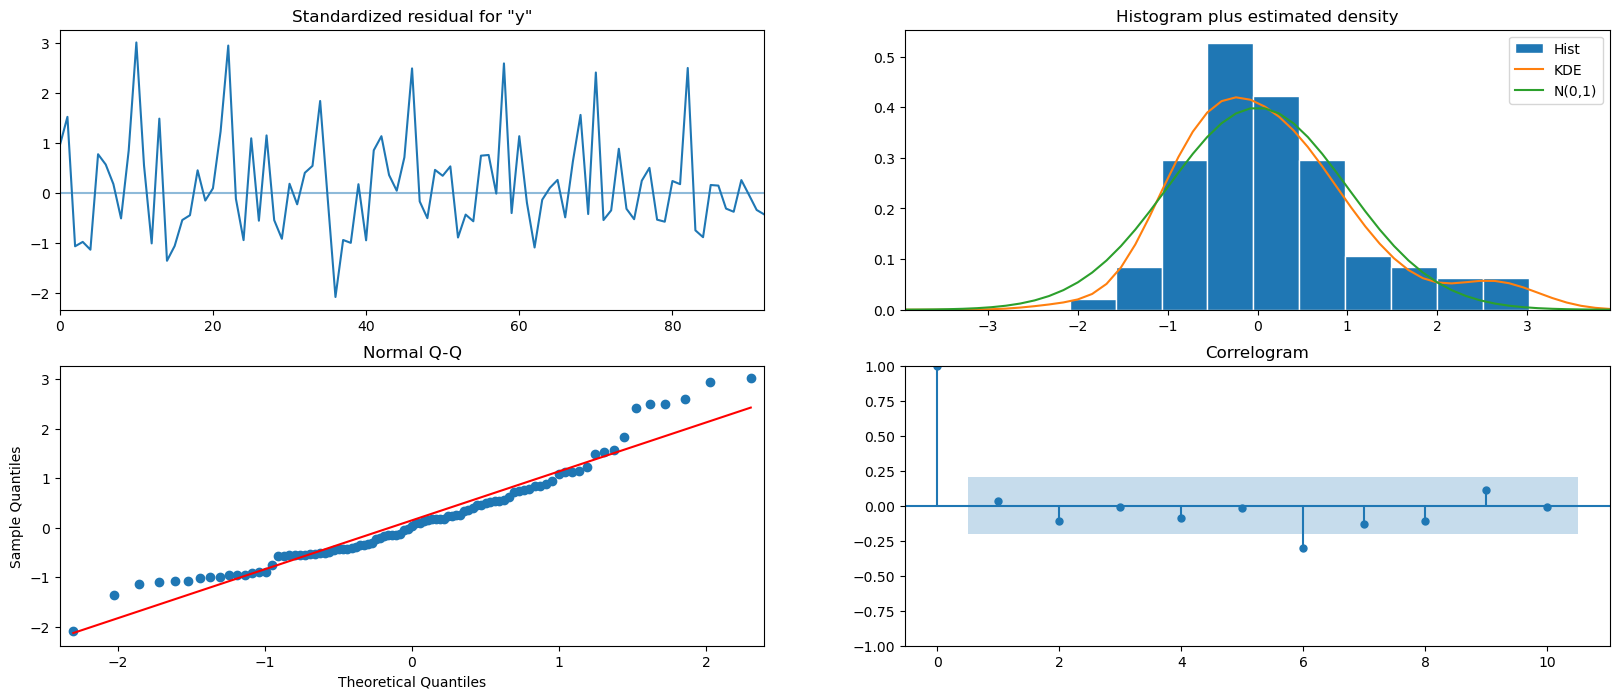

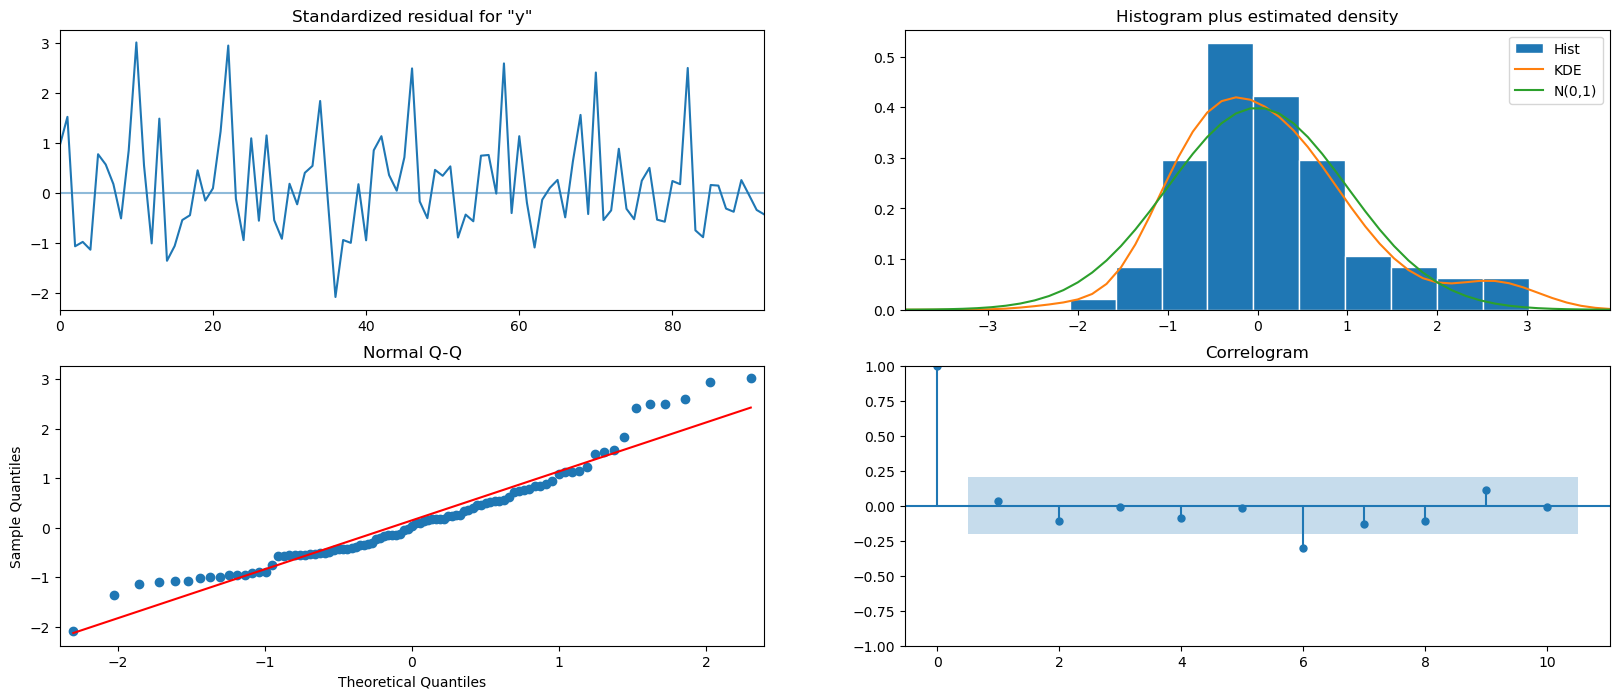

In [132]:
results_manual_SARIMA_12.plot_diagnostics()

In [133]:
predicted_manual_SARIMA = results_manual_SARIMA_12.forecast(steps=len(test_rose))
rmse_manual_sarima= mean_squared_error(test_rose['Rose'],predicted_manual_SARIMA,squared=False)
print('RMSE:',rmse_manual_sarima)

RMSE: 20.841143161319355


In [134]:
manual_sarima = pd.DataFrame({'Test RMSE': rmse_manual_sarima },index=['Manual SArima (1, 1, 2)x(1, 1, 2, 11) '])
Eval_DF = pd.concat([Eval_DF,manual_sarima])
Eval_DF

Test RMSE
Linear Regression                                   17.355787
SimpleAverageModel                                  52.411878
2pointTrailingMovingAverage                         11.801043
4pointTrailingMovingAverage                         15.367176
6pointTrailingMovingAverage                         15.862298
9pointTrailingMovingAverage                         16.341888
Alpha=0.128,Simple Exponentital Smoothing           29.223468
Alpha= 4.3228814168489945e-07,Beta=1.1863431936...  17.355546
Alpha= 0.088,Beta=0.0001,Gamma = 0.0018:TES_TA_SA   13.956491
Alpha= 0.099,Beta=0.0000000024,Gamma = 0.000000...   9.325407
Alpha= 0.06,Beta=0.00003,Gamma = 0.000659:TES_T...  11.725478
Alpha= 0.00000029,Beta=0.0000000000000000008,Ga...  15.662454
Auto Arima (1,1,2)                                  30.903593
Auto SArima (0, 1, 2)x(2, 0, 2, 12)                 25.343104
Manual Arima (1,1,2)                                30.467871
Manual SArima (1, 1, 2)x(1, 1, 2, 11)               20.841143

# Compare the performance of the models
- Compare the performance of all the models built - Choose the best model with proper rationale - Rebuild the best model using the entire data - Make a forecast for the next 12 months

In [135]:
model_tes_ta_sm = ExponentialSmoothing(data_rose['Rose'], trend = 'additive', seasonal = 'multiplicative')

C:\Users\ebyeb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [136]:
Beta =  0.0000000024733033543760145


In [137]:
Gamma = 0.00000022407585658472406
Alpha= 0.099

In [138]:
model_TES = model_tes_ta_sm.fit(smoothing_level=Alpha,smoothing_slope=Beta,smoothing_seasonal=Gamma,
                                optimized=False,use_brute=True)
prediction=model_TES.forecast(steps=12)

C:\Users\ebyeb\AppData\Local\Temp\ipykernel_29896\750198260.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model_TES = model_tes_ta_sm.fit(smoothing_level=Alpha,smoothing_slope=Beta,smoothing_seasonal=Gamma,


In [139]:
prediction

1995-08-31    64.723010
1995-09-30    59.520230
1995-10-31    56.535564
1995-11-30    67.474780
1995-12-31    97.616956
1996-01-31    45.968499
1996-02-29    49.530406
1996-03-31    55.528837
1996-04-30    47.948931
1996-05-31    56.261932
1996-06-30    59.835167
1996-07-31    71.239307
Freq: M, dtype: float64

In [140]:
date_future = pd.date_range(start='8/31/1995', end='7/31/1996', freq='M')
date_future

DatetimeIndex(['1995-08-31', '1995-09-30', '1995-10-31', '1995-11-30',
               '1995-12-31', '1996-01-31', '1996-02-29', '1996-03-31',
               '1996-04-30', '1996-05-31', '1996-06-30', '1996-07-31'],
              dtype='datetime64[ns]', freq='M')

In [141]:
future_predictions=pd.DataFrame(columns=['Rose_sales'],index=date_future)

In [142]:
future_predictions

Rose_sales
1995-08-31        NaN
1995-09-30        NaN
1995-10-31        NaN
1995-11-30        NaN
1995-12-31        NaN
1996-01-31        NaN
1996-02-29        NaN
1996-03-31        NaN
1996-04-30        NaN
1996-05-31        NaN
1996-06-30        NaN
1996-07-31        NaN

In [143]:
future_predictions['Rose_sales']=prediction
future_predictions

Rose_sales
1995-08-31   64.723010
1995-09-30   59.520230
1995-10-31   56.535564
1995-11-30   67.474780
1995-12-31   97.616956
1996-01-31   45.968499
1996-02-29   49.530406
1996-03-31   55.528837
1996-04-30   47.948931
1996-05-31   56.261932
1996-06-30   59.835167
1996-07-31   71.239307

<Axes: >

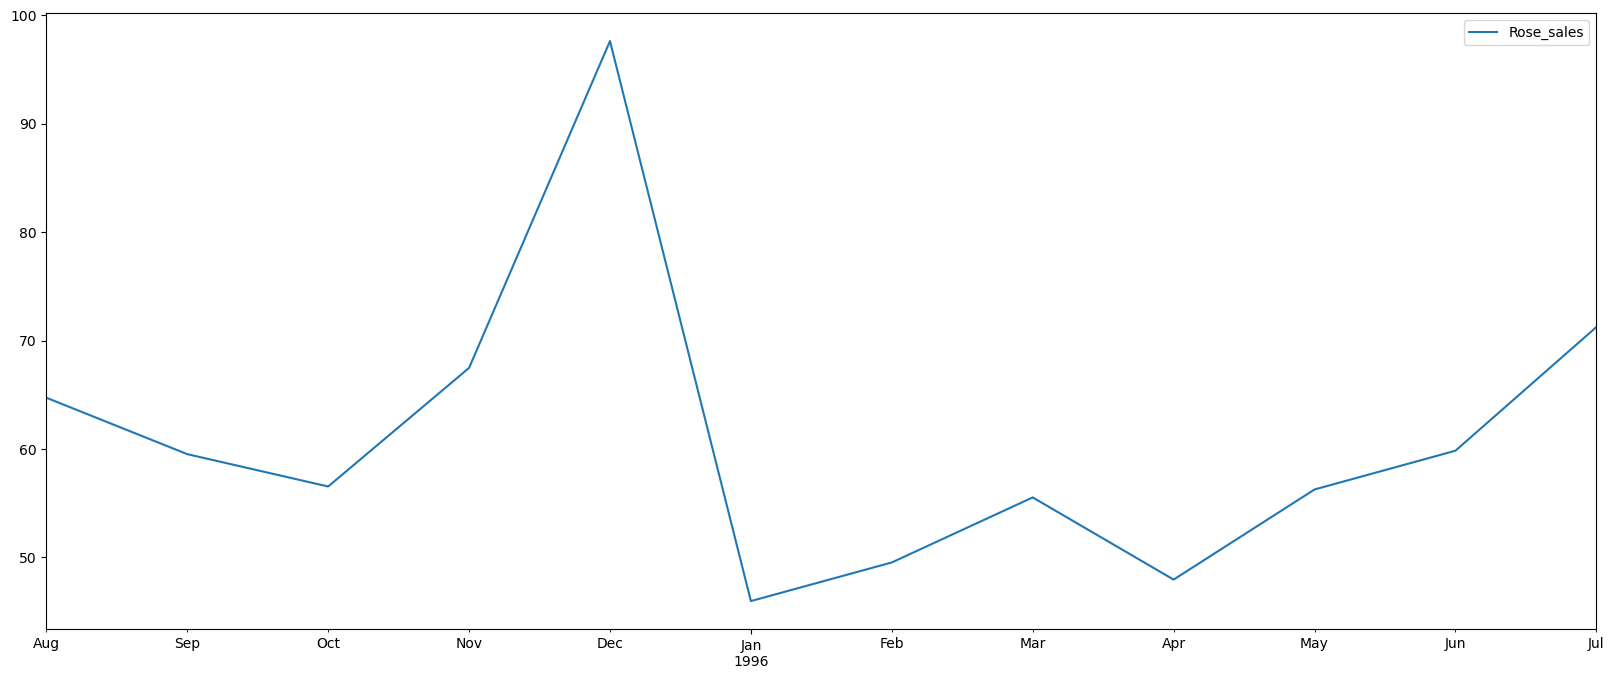

In [144]:
future_predictions.plot()